In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, gc, os, glob
sys.path.append('/Users/earnric/Google Drive/ASU/Codes/PythonCode/modules')

import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

import numpy as np
from IPython import display

from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import astropy 

import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
sns.set(style="whitegrid", font_scale=2, color_codes=True)
sns.set_style({'axes.edgecolor': '0.0','axes.linewidth': 2.0})

plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

pd.set_option('precision', 5)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
np.set_printoptions(linewidth=170)

In [2]:
def log_formatter(x,pos):
    return format(np.log10(x), '.0f')
logfmt  = FuncFormatter(log_formatter)

def log_GHzFormatter(x,pos):
    return format(np.log10(x)-9.0, '.0f')
logGHzfmt  = FuncFormatter(log_GHzFormatter)

def GHzFormatter(x,pos):
    return format(x/1e9, '.2e')
GHzfmt  = FuncFormatter(GHzFormatter)

def mic_formatter(x,pos):
    return format(x/10000., '.1f')
micfmt  = FuncFormatter(mic_formatter)

nullfmt = NullFormatter()
labelsize = 24

In [3]:
def dec(x):
    return r"{:d}".format(int(x))

def float1(x):
    return r"{:.1f}".format(x)

def float3(x):
    return r"{:.3f}".format(x)



In [4]:
#
# Convert flux into magnitude, no extinction...
#
ABref = 48.6
def mag(flux):
    """Convert flux into magnitude, no extinction"""
    return -2.5 * np.log10(flux) - ABref # (1+z) there since I forgot it in flux computation.

def compMags(dir,z):
    """Convert observed magnitude to Absolute"""
    # See notebook for calculation: D = m_ab - M_ab
    cDM = 2.5*np.log10((1.0+z)**-1*(cosmo.luminosity_distance(z).to(u.pc)/(10.0 * u.pc))**2) 

    print("Convert to Abs Mag. DM = {:.2f} @ z={:.1f}".format(cDM,z))
    absMag   = mag(haloData[dir][z]['1500A'])-cDM
    pop3Mag  = mag(haloData[dir][z]['1500A_P3'])-cDM
    nmAbsMag = mag(haloData[dir][z]['1500A_NM'])-cDM
    return absMag, pop3Mag,nmAbsMag


def getMag(Mags,z):
    """Convert Absolute magnitude to observational at z"""
    cDM = 2.5*np.log10((1.0+z)**-1*(cosmo.luminosity_distance(z).to(u.pc)/(10.0 * u.pc))**2) 
    return Mags + cDM


def getHaloMasses(dir,z):
    return haloData[dir][z]['MstarMsun']

def getHaloP3Masses(dir,z):
    return haloData[dir][z]['M3StarMsun']

def getHaloRadii(dir,z):
    return haloData[dir][z]['r_v']

# Load Data

In [5]:
# Load the raw halos that have DM masses ... these are not used directly for the LM compuation
# since they haven't been processed by finalizeDenPro2.py where we look for observationally 
# distinguishable galaxies. However, we can get a DM mass for a given stellar mass using these
# galaxies... 

dmMasses={}
runs = ['P3SN','fid','fid','p3SN','fid']
for name, rootPath in zip(runs, ['./P3SN/','./Z-4/','./Z-6/','./p3SN/','../12Mpc-n1.0-eps01-fek1-del200-rb300-newICs/']):
    filePat = 'stellar_DM_masses_z_[0-9]*.[05].txt' 
    files   = glob.glob(rootPath+filePat)  
    fileListz = []
    for file in files:
        start = file.index('z_') + 2
        end = len(file) - 4
        fileListz.append(file[start:end])
    # We now have all the z's for the halo files
    massFiles = {float(filez):  np.genfromtxt(file, delimiter=',',names=True) for filez,file in zip(fileListz,files)}
    dmMasses[name] = massFiles
    print(name, fileListz)
    
# dmMasses has flux and DM Mass info for all of the RAW halos... 
# We'll use these to find DM masses based on Stellar mass

fw1 ['10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '7.0', '8.0', '9.0']
Z4 ['10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '7.0', '8.0', '9.0']
Z6 ['10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '7.0', '8.0', '9.0']
p3SN ['10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '7.0', '8.0', '9.0']
fid ['10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '7.0', '8.0', '9.0']


In [58]:
# haloData={}
# runs = ['fid','P3SN','fid','fid','p3SN']
# for name, rootPath in zip(runs, ['../12Mpc-n1.0-eps01-fek1-del200-rb300-newICs/','./P3SN/','./Z-4/','./Z-6/','./p3SN/']):
#     filePat = 'haloFluxes_UV_z_[0-9]*.[05].txt' 
#     files   = glob.glob(rootPath+filePat)  
#     fileListz = []
#     for file in files:
#         start = file.index('z_') + 2
#         end = len(file) - 4
#         fileListz.append(file[start:end])
#     fluxes = {float(filez):  np.genfromtxt(file, delimiter=',',names=True) for filez,file in zip(fileListz,files)}
#     print(files,"\n",fileListz)
#     haloData[name] = fluxes


haloData={}

fluxes = {14: np.genfromtxt('./p3SN/haloFluxes_UV_z_14.0.txt', delimiter=',',names=True),
         13: np.genfromtxt('./p3SN/haloFluxes_UV_z_13.0.txt', delimiter=',',names=True),
         12: np.genfromtxt('./p3SN/haloFluxes_UV_z_12.0.txt', delimiter=',',names=True),
         11: np.genfromtxt('./p3SN/haloFluxes_UV_z_11.0.txt', delimiter=',',names=True),
         10: np.genfromtxt('./p3SN/haloFluxes_UV_z_10.0.txt', delimiter=',',names=True),
         9: np.genfromtxt('./p3SN/haloFluxes_UV_z_9.0.txt', delimiter=',',names=True),
         8: np.genfromtxt('./p3SN/haloFluxes_UV_z_8.0.txt', delimiter=',',names=True),
         7: np.genfromtxt('./p3SN/haloFluxes_UV_z_7.0.txt', delimiter=',',names=True)}
haloData['P3SN'] = fluxes

fluxes = {14: np.genfromtxt('./fid/haloFluxes_UV_z_14.0_salP3.txt', delimiter=',',names=True),
         13: np.genfromtxt('./fid/haloFluxes_UV_z_13.0_salP3.txt', delimiter=',',names=True),
         12: np.genfromtxt('./fid/haloFluxes_UV_z_12.0_salP3.txt', delimiter=',',names=True),
         11: np.genfromtxt('./fid/haloFluxes_UV_z_11.0_salP3.txt', delimiter=',',names=True),
         10: np.genfromtxt('./fid/haloFluxes_UV_z_10.0_salP3.txt', delimiter=',',names=True),
         9: np.genfromtxt('./fid/haloFluxes_UV_z_9.0_salP3.txt', delimiter=',',names=True),
         8: np.genfromtxt('./fid/haloFluxes_UV_z_8.0_salP3.txt', delimiter=',',names=True),
         7: np.genfromtxt('./fid/haloFluxes_UV_z_7.0_salP3.txt', delimiter=',',names=True)}
haloData['fid'] = fluxes

fluxes = {14: np.genfromtxt('./fid/haloFluxes_UV_z_14.0.txt', delimiter=',',names=True),
         13: np.genfromtxt('./fid/haloFluxes_UV_z_13.0.txt', delimiter=',',names=True),
         12: np.genfromtxt('./fid/haloFluxes_UV_z_12.0.txt', delimiter=',',names=True),
         11: np.genfromtxt('./fid/haloFluxes_UV_z_11.0.txt', delimiter=',',names=True),
         10: np.genfromtxt('./fid/haloFluxes_UV_z_10.0.txt', delimiter=',',names=True),
         9: np.genfromtxt('./fid/haloFluxes_UV_z_9.0.txt', delimiter=',',names=True),
         8: np.genfromtxt('./fid/haloFluxes_UV_z_8.0.txt', delimiter=',',names=True),
         7: np.genfromtxt('./fid/haloFluxes_UV_z_7.0.txt', delimiter=',',names=True)}
haloData['fid_orig'] = fluxes

# fluxes = {15: np.genfromtxt('./fid/haloFluxes_UV_z_15.0.txt', delimiter=',',names=True),
#          12: np.genfromtxt('./fid/haloFluxes_UV_z_12.0.txt', delimiter=',',names=True),
#          10: np.genfromtxt('./fid/haloFluxes_UV_z_10.0.txt', delimiter=',',names=True),
#          9: np.genfromtxt('./fid/haloFluxes_UV_z_9.0.txt', delimiter=',',names=True),
#          8: np.genfromtxt('./fid/haloFluxes_UV_z_8.0.txt', delimiter=',',names=True),
#          7: np.genfromtxt('./fid/haloFluxes_UV_z_7.0.txt', delimiter=',',names=True)}
# haloData['Fid_Orig'] = fluxes


thezs = [15,12,10,9,8,7]
# haloData={}
# runs = ['P3SN','Fiducial']
# for name, rootPath in zip(runs, ['./p3SN/','./fid/']):
#     filePat = 'haloFluxes_UV_z_[0-9]*.[05].txt' 
#     files   = glob.glob(rootPath+filePat)  
#     fileListz = []
#     for file in files:
#         start = file.index('z_') + 2
#         end = len(file) - 4
#         fileListz.append(file[start:end])
#     fluxes = {float(filez):  np.genfromtxt(file, delimiter=',',names=True) for filez,file in zip(fileListz,files)}
#     haloData[name] = fluxes
#     print(name, fileListz)
    
# for z in sorted(fileListz,reverse=True):
#     print("Number of halos for z={} is {}".format(z,len(fluxes[float(z)]['halo'])) )
# thezs= [float(i) for i in fileListz]
print(thezs)
runs = list(haloData.keys())
print(runs)
print("p3sn", len(haloData['P3SN'][7]))
print("fid", len(haloData['fid'][7]))
# print("fid orig", len(haloData['Fid_Orig'][7]))


[15, 12, 10, 9, 8, 7]
['P3SN', 'fid', 'fid_orig']
p3sn 9240
fid 8248


In [59]:
fileListz,haloData['P3SN'][7].dtype.names, files # Ensure they match up...

(['10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '7.0', '8.0', '9.0'],
 ('halo',
  'r_v',
  'ZZsun',
  'ZPZsun',
  'MstarMsun',
  'M3StarMsun',
  'M3YngMsun',
  '1500A',
  '1500A_P3',
  '1500A_NM',
  '1500A_P3NM',
  '1500A_10pc',
  '1500A_P3_10pc'),
 ['../12Mpc-n1.0-eps01-fek1-del200-rb300-newICs/stellar_DM_masses_z_10.0.txt',
  '../12Mpc-n1.0-eps01-fek1-del200-rb300-newICs/stellar_DM_masses_z_11.0.txt',
  '../12Mpc-n1.0-eps01-fek1-del200-rb300-newICs/stellar_DM_masses_z_12.0.txt',
  '../12Mpc-n1.0-eps01-fek1-del200-rb300-newICs/stellar_DM_masses_z_13.0.txt',
  '../12Mpc-n1.0-eps01-fek1-del200-rb300-newICs/stellar_DM_masses_z_14.0.txt',
  '../12Mpc-n1.0-eps01-fek1-del200-rb300-newICs/stellar_DM_masses_z_15.0.txt',
  '../12Mpc-n1.0-eps01-fek1-del200-rb300-newICs/stellar_DM_masses_z_16.0.txt',
  '../12Mpc-n1.0-eps01-fek1-del200-rb300-newICs/stellar_DM_masses_z_7.0.txt',
  '../12Mpc-n1.0-eps01-fek1-del200-rb300-newICs/stellar_DM_masses_z_8.0.txt',
  '../12Mpc-n1.0-eps01-fek1-del2

## Build dicts of the Pop III flux fraction for observable (31.4 mag) and dim galaxies

In [60]:
haloData['fid'].keys()

dict_keys([7, 8, 9, 10, 11, 12, 13, 14])

In [68]:
#
# Build a dict of f_III/f_tot ratios for all galaxies
#
p3mf = {dir: {i:haloData[dir][i]['M3StarMsun']/haloData[dir][i]['MstarMsun'] for i in sorted(haloData[dir].keys())} for dir in runs}
p3ymf = {dir: {i:haloData[dir][i]['M3YngMsun']/haloData[dir][i]['MstarMsun'] for i in sorted(haloData[dir].keys())} for dir in runs}
p3ff = {dir: {i:haloData[dir][i]['1500A_P3']/haloData[dir][i]['1500A'] for i in sorted(haloData[dir].keys())} for dir in runs}
# Build a dict of obs mag_AB for all galaxies 
mags = {dir: {i: mag(haloData[dir][i]['1500A']) for i in sorted(haloData[dir].keys())} for dir in runs}

# Some for the uncorrected Pop III flux... and mag... 
p3ffNM = {dir: {i:haloData[dir][i]['1500A_P3NM']/haloData[dir][i]['1500A_NM'] for i in sorted(haloData[dir].keys())} for dir in runs}
magsNM = {dir: {i: mag(haloData[dir][i]['1500A_NM']) for i in sorted(haloData[dir].keys())} for dir in runs}

simVol = (12/0.71)**3 # Mpc

     The above looks correct ... at Z-4 we have a higher # of Pop III stars so the # with ff > 0.75 should be larger
     Similarly, at Z-6, there should be fewer

In [69]:
((mags['fid'][12] <= 31.4)).nonzero()[0].size,  p3ff['fid'][12][(p3ff['fid'][12] >= 0.75) & (mags['fid'][12] <= 31.4)].size

(5, 0)

 ** p3ff and p3ffNM are a dicts of Pop III flux fractions for all halos at each redshift **

In [70]:
tempfid = mag(haloData['fid'][12]['1500A'])
temprat = haloData['fid'][12]['1500A_P3']/haloData['fid'][12]['1500A']
print(np.where(tempfid <= 31.5)) # Indices 
print(np.where(temprat >= .75))

tempfid = mag(haloData['fid'][12]['1500A'])
temprat = haloData['fid'][12]['1500A_P3']/haloData['fid'][12]['1500A']
print(np.where(tempfid <= 31.5)) # Indices 
print(np.where(temprat >= .75))

(array([ 18, 108, 128, 194, 225]),)
(array([  6,   8,  11,  20,  36,  42,  52,  64,  72,  77,  88,  92,  94,  98, 106, 113, 123, 142, 155, 157, 166, 168, 177, 182, 183, 184, 185, 191, 192, 196, 205, 206,
       208, 218, 222, 229, 245, 246, 251, 257, 265, 268, 269, 275, 289, 298, 301, 304, 306, 308, 315, 317, 321, 322, 325, 326, 331, 343, 346, 349, 351, 352, 355, 360,
       362, 373, 380, 393, 404, 407, 411, 413, 419, 420, 424, 431, 440, 441, 444, 448, 452, 454, 458, 459, 471, 473, 495, 499, 503, 508, 511, 520, 522, 523, 534]),)
(array([ 18, 108, 128, 194, 225]),)
(array([  6,   8,  11,  20,  36,  42,  52,  64,  72,  77,  88,  92,  94,  98, 106, 113, 123, 142, 155, 157, 166, 168, 177, 182, 183, 184, 185, 191, 192, 196, 205, 206,
       208, 218, 222, 229, 245, 246, 251, 257, 265, 268, 269, 275, 289, 298, 301, 304, 306, 308, 315, 317, 321, 322, 325, 326, 331, 343, 346, 349, 351, 352, 355, 360,
       362, 373, 380, 393, 404, 407, 411, 413, 419, 420, 424, 431, 440, 441, 444, 448, 452, 4

## Compute the Pop III flux fraction, errors data and other useful info... 

In [71]:
def cond(dir, p3ff, z, frac, lim_mag, mags):
    return ((p3ff[dir][z] >= frac) & (mags[dir][z] <= lim_mag))

# Return err, lower then upper bound
def findErrs(val,a,b):
    lower = np.nan_to_num((a-np.sqrt(a))/(b+np.sqrt(b))) # This is the VALUE of the data pt - errLow
    upper = np.nan_to_num((a+np.sqrt(a))/(b-np.sqrt(b))) # This is the VALUE of the data pt + errHigh
    lower = val - lower # normalize
    upper = upper - val
    return np.array([lower, upper])

def pop3_bright_frac(p3_ff,limMag,mags,runs):
    print(runs)
    pop3_bright = {}
    errs        = {}
    for dir in runs:
        print(dir)
        thezs = sorted(haloData[dir].keys())
        p3ff75 = {i: p3_ff[dir][i][cond(dir,p3_ff,i,0.75,limMag,mags)] for i in thezs}
        bright = {i: p3_ff[dir][i][cond(dir,p3_ff,i,0.0,limMag,mags)] for i in thezs}
        
#         print("Number of Pop III bright galaxies per z for {}:".format(dir),[(i,p3ff75[i].size) for i in thezs])
#         print("Number of bright galaxies per z for {}        :".format(dir),[(i,bright[i].size) for i in thezs])

        # COMPUTE SHOT NOISE... 
        # #P3 bright + sqrt(#P3 bright)/(#bright + sqrt(#bright))
        brightCount = {i:np.array(len(p3_ff[dir][i][cond(dir,p3_ff,i,0.75,limMag,mags)]))  for i in thezs}
        totCount    = {i:np.array(len(p3_ff[dir][i][cond(dir,p3_ff,i,0.0,limMag,mags)])) for i in thezs}
        print(brightCount,"\n",totCount)

        # Get fraction with P>0.75 / P>0.0 and brighter than limiting magnitude (31.4)
        # casting len to a np.array helps me deal with 0/0
        p3frac75 = {i: np.nan_to_num(brightCount[i] / totCount[i]) for i in thezs}

        # Error of a product (ratio) of two variables is ( (a+- sqrt a) / (b +- sqrt(b)) where
        # dx and dN are sqrt(x) and sqrt(N) the poisson error ... 
        errors     = np.array([findErrs(p3frac75[i], brightCount[i],totCount[i]) for i in thezs])

#         p3_ff50 = {i: p3_ff[dir][i][cond(dir,p3_ff,i,0.50,limMag,mags)] for i in thezs}
#         Zs75   = {i: haloData[dir][i]['ZZsun'][cond(dir,p3_ff,i,0.75,limMag,mags)] for i in thezs}
#         Ms75   = {i: haloData[dir][i]['MstarMsun'][cond(dir,p3_ff,i,0.75,limMag,mags)] for i in thezs}
#         Mags75 = {i: mag(haloData[dir][i]['1500A_10pc'][cond(dir,p3_ff,i,0.75,limMag,mags)]) for i in thezs}
#         mags75 = {i: mag(haloData[dir][i]['1500A'][cond(dir,p3_ff,i,0.75,limMag,mags)]) for i in thezs}
#         haloNum = {i: np.arange(len(p3_ff[dir][i]))[cond(dir,p3_ff,i,0.75,limMag,mags)] for i in thezs}

#         Mags50 = {i: mag(haloData[dir][i]['1500A_10pc'][cond(dir,p3_ff,i,0.5,limMag,mags)]) for i in thezs}
#         mags50 = {i: mag(haloData[dir][i]['1500A'][cond(dir,p3_ff,i,0.5,limMag,mags)]) for i in thezs}

        pop3_bright[dir] = p3frac75 # Create a dictionary of the FRACTION of Pop III Bright galaxies at each redshift
        errs[dir]   = np.array([errors[:,0],errors[:,1]]) # Re-order error per z into 2 lists: upper bounds (for all z) and lower (for all z)
    return pop3_bright,errs


In [72]:
pop3_bright,errsNormal = pop3_bright_frac(p3ff,31.4,mags,runs)

['P3SN', 'fid', 'fid_orig']
P3SN
{7: array(1), 8: array(1), 9: array(24), 10: array(1), 11: array(0), 12: array(1), 13: array(0), 14: array(0)} 
 {7: array(382), 8: array(200), 9: array(128), 10: array(27), 11: array(9), 12: array(3), 13: array(0), 14: array(0)}
fid
{7: array(0), 8: array(0), 9: array(0), 10: array(0), 11: array(0), 12: array(0), 13: array(0), 14: array(0)} 
 {7: array(539), 8: array(310), 9: array(165), 10: array(48), 11: array(16), 12: array(5), 13: array(0), 14: array(0)}
fid_orig
{7: array(2), 8: array(2), 9: array(38), 10: array(2), 11: array(0), 12: array(0), 13: array(0), 14: array(0)} 
 {7: array(535), 8: array(312), 9: array(204), 10: array(50), 11: array(16), 12: array(5), 13: array(0), 14: array(0)}


/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in true_divide
/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars
/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


In [73]:
p3ff['fid'][12][cond('fid', p3ff, 12, 0.75, 31.4, mags)].size, p3ff['fid'][12][cond('fid', p3ff, 12, 0.0, 31.4, mags)].size

(0, 5)

In [74]:
1/5, 2/(5-np.sqrt(5)) - .2

(0.2, 0.523606797749979)

In [75]:
p3ff['fid'][12][cond('fid', p3ff, 12, 0.75, 31.4, mags)].size, p3ff['fid'][12][cond('fid', p3ff, 12, 0.0, 31.4, mags)].size

(0, 5)

In [76]:
errsNormal['fid'],errsNormal['fid']

(array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]))

In [77]:
# Extract the data from the dictionary for plotting
limMag = 31.4
P3B_obs_zs    = {dir: np.fromiter(iter(sorted(pop3_bright[dir])), dtype=float) for dir in runs} # zs
P3B_obs_fract = {dir: [pop3_bright[dir][i] for i in P3B_obs_zs[dir]] for dir in runs}  # Pop III fraction @ z
n_obs_gals    = {dir: [len(haloData[dir][i][cond(dir,p3ff,i,0.0,limMag,mags)]) for i in P3B_obs_zs[dir]] for dir in runs}

print([(dir, P3B_obs_zs[dir]) for dir in runs],"\n")
print([(dir, P3B_obs_fract[dir]) for dir in runs],"\n")
print([(dir, n_obs_gals[dir]) for dir in runs])

[('P3SN', array([ 7.,  8.,  9., 10., 11., 12., 13., 14.])), ('fid', array([ 7.,  8.,  9., 10., 11., 12., 13., 14.])), ('fid_orig', array([ 7.,  8.,  9., 10., 11., 12., 13., 14.]))] 

[('P3SN', [0.002617801047120419, 0.005, 0.1875, 0.037037037037037035, 0.0, 0.3333333333333333, 0.0, 0.0]), ('fid', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), ('fid_orig', [0.003738317757009346, 0.00641025641025641, 0.18627450980392157, 0.04, 0.0, 0.0, 0.0, 0.0])] 

[('P3SN', [382, 200, 128, 27, 9, 3, 0, 0]), ('fid', [539, 310, 165, 48, 16, 5, 0, 0]), ('fid_orig', [535, 312, 204, 50, 16, 5, 0, 0])]


In [78]:
pop3_bright_dim,errsDim = pop3_bright_frac(p3ff,33,mags,runs)

['P3SN', 'fid', 'fid_orig']
P3SN
{7: array(51), 8: array(61), 9: array(375), 10: array(22), 11: array(8), 12: array(10), 13: array(2), 14: array(1)} 
 {7: array(1168), 8: array(788), 9: array(788), 10: array(145), 11: array(56), 12: array(26), 13: array(7), 14: array(1)}
fid
{7: array(7), 8: array(3), 9: array(31), 10: array(2), 11: array(0), 12: array(0), 13: array(0), 14: array(0)} 
 {7: array(2156), 8: array(1593), 9: array(739), 10: array(245), 11: array(129), 12: array(51), 13: array(24), 14: array(6)}
fid_orig
{7: array(44), 8: array(45), 9: array(413), 10: array(21), 11: array(14), 12: array(12), 13: array(2), 14: array(2)} 
 {7: array(2157), 8: array(1582), 9: array(1131), 10: array(261), 11: array(144), 12: array(63), 13: array(26), 14: array(8)}


/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in double_scalars


In [79]:
limMag = 33.0
# Extract the data from the dictionary for plotting
P3B_dim_zs    = {dir: np.fromiter(iter(sorted(pop3_bright_dim[dir])), dtype=float) for dir in runs} # zs
P3B_dim_fract = {dir: [pop3_bright_dim[dir][i] for i in P3B_dim_zs[dir]] for dir in runs}  # Pop III fraction @ z
n_dim_gals    = {dir: [len(haloData[dir][i][cond(dir,p3ff,i,0.0,limMag,mags)]) for i in P3B_dim_zs[dir]] for dir in runs} # num obs g

print([(dir, P3B_dim_zs[dir]) for dir in runs],"\n")
print([(dir, P3B_dim_fract[dir]) for dir in runs],"\n")
print([(dir, n_dim_gals[dir]) for dir in runs])

[('P3SN', array([ 7.,  8.,  9., 10., 11., 12., 13., 14.])), ('fid', array([ 7.,  8.,  9., 10., 11., 12., 13., 14.])), ('fid_orig', array([ 7.,  8.,  9., 10., 11., 12., 13., 14.]))] 

[('P3SN', [0.04366438356164384, 0.07741116751269035, 0.47588832487309646, 0.15172413793103448, 0.14285714285714285, 0.38461538461538464, 0.2857142857142857, 1.0]), ('fid', [0.003246753246753247, 0.0018832391713747645, 0.04194857916102842, 0.00816326530612245, 0.0, 0.0, 0.0, 0.0]), ('fid_orig', [0.020398701900788133, 0.028445006321112517, 0.3651635720601238, 0.08045977011494253, 0.09722222222222222, 0.19047619047619047, 0.07692307692307693, 0.25])] 

[('P3SN', [1168, 788, 788, 145, 56, 26, 7, 1]), ('fid', [2156, 1593, 739, 245, 129, 51, 24, 6]), ('fid_orig', [2157, 1582, 1131, 261, 144, 63, 26, 8])]


## No Mixing

**Be sure to rebuild all arrays above if you try to print out tables again!**

**This section uses the same names!**

In [80]:
pop3_bright_NM,errsNM = pop3_bright_frac(p3ffNM,31.4,magsNM,runs)

['P3SN', 'fid', 'fid_orig']
P3SN
{7: array(0), 8: array(2), 9: array(9), 10: array(1), 11: array(0), 12: array(1), 13: array(0), 14: array(0)} 
 {7: array(381), 8: array(201), 9: array(111), 10: array(27), 11: array(9), 12: array(3), 13: array(0), 14: array(0)}
fid
{7: array(0), 8: array(0), 9: array(1), 10: array(0), 11: array(0), 12: array(0), 13: array(0), 14: array(0)} 
 {7: array(539), 8: array(311), 9: array(167), 10: array(48), 11: array(16), 12: array(5), 13: array(0), 14: array(0)}
fid_orig
{7: array(0), 8: array(0), 9: array(17), 10: array(1), 11: array(0), 12: array(0), 13: array(0), 14: array(0)} 
 {7: array(537), 8: array(310), 9: array(184), 10: array(49), 11: array(16), 12: array(5), 13: array(0), 14: array(0)}


/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in true_divide
/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars
/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


In [81]:
limMag = 31.4
# Extract the data from the dictionary for plotting
P3BNM_obs_zs    = {dir: np.fromiter(iter(sorted(pop3_bright_NM[dir])), dtype=float) for dir in runs} # zs
P3BNM_obs_fract = {dir: [pop3_bright_NM[dir][i] for i in P3BNM_obs_zs[dir]] for dir in runs}  # Pop III fraction @ z
nNM_obs_gals    = {dir: [len(haloData[dir][i][cond(dir,p3ffNM,i,0.0,limMag,mags)]) for i in P3BNM_obs_zs[dir]] for dir in runs} # num obs g

print([(dir, P3BNM_obs_zs[dir]) for dir in runs],"\n")
print([(dir, P3BNM_obs_fract[dir]) for dir in runs],"\n")
print([(dir, nNM_obs_gals[dir]) for dir in runs])

[('P3SN', array([ 7.,  8.,  9., 10., 11., 12., 13., 14.])), ('fid', array([ 7.,  8.,  9., 10., 11., 12., 13., 14.])), ('fid_orig', array([ 7.,  8.,  9., 10., 11., 12., 13., 14.]))] 

[('P3SN', [0.0, 0.009950248756218905, 0.08108108108108109, 0.037037037037037035, 0.0, 0.3333333333333333, 0.0, 0.0]), ('fid', [0.0, 0.0, 0.005988023952095809, 0.0, 0.0, 0.0, 0.0, 0.0]), ('fid_orig', [0.0, 0.0, 0.09239130434782608, 0.02040816326530612, 0.0, 0.0, 0.0, 0.0])] 

[('P3SN', [382, 200, 128, 27, 9, 3, 0, 0]), ('fid', [539, 310, 165, 48, 16, 5, 0, 0]), ('fid_orig', [535, 312, 204, 50, 16, 5, 0, 0])]


In [82]:
from matplotlib.ticker import FuncFormatter
# ##########################################################
# Format tick labels using their exponent only... 
# ##########################################################
def formatter(x,pos):
    return format(np.log10(x), '.0f')


In [83]:
for dir in runs:
    P3B_obs_fract[dir] = np.array(P3B_obs_fract[dir])
    P3BNM_obs_fract[dir]= np.array(P3BNM_obs_fract[dir])
    P3B_dim_fract[dir] = np.array(P3B_dim_fract[dir])

In [84]:
for dir in runs:
    P3B_obs_fract[dir][P3B_obs_fract[dir] < 0.0001] = 0.0001
    P3BNM_obs_fract[dir][P3BNM_obs_fract[dir] < 0.0001] = 0.0001
    P3B_dim_fract[dir][P3B_dim_fract[dir] < 0.0001] = 0.0001


In [85]:
#
# Fractions of P3 bright for our halos...
#

P3B_obs_fract['P3SN'],errsNormal['P3SN']#, errsDim['P3SN'], errsNM['P3SN']

(array([2.61780105e-03, 5.00000000e-03, 1.87500000e-01, 3.70370370e-02, 1.00000000e-04, 3.33333333e-01, 1.00000000e-04, 1.00000000e-04]),
 array([[0.0026178 , 0.005     , 0.05039202, 0.03703704, 0.        , 0.33333333, 0.        , 0.        ],
        [0.00290012, 0.00576091, 0.06016388, 0.05468989, 0.        , 1.24401694, 0.        , 0.        ]]))

In [86]:
P3B_obs_fract['fid'],P3B_obs_fract['fid']

(array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]),
 array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]))

/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/numpy/ma/core.py:6649: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


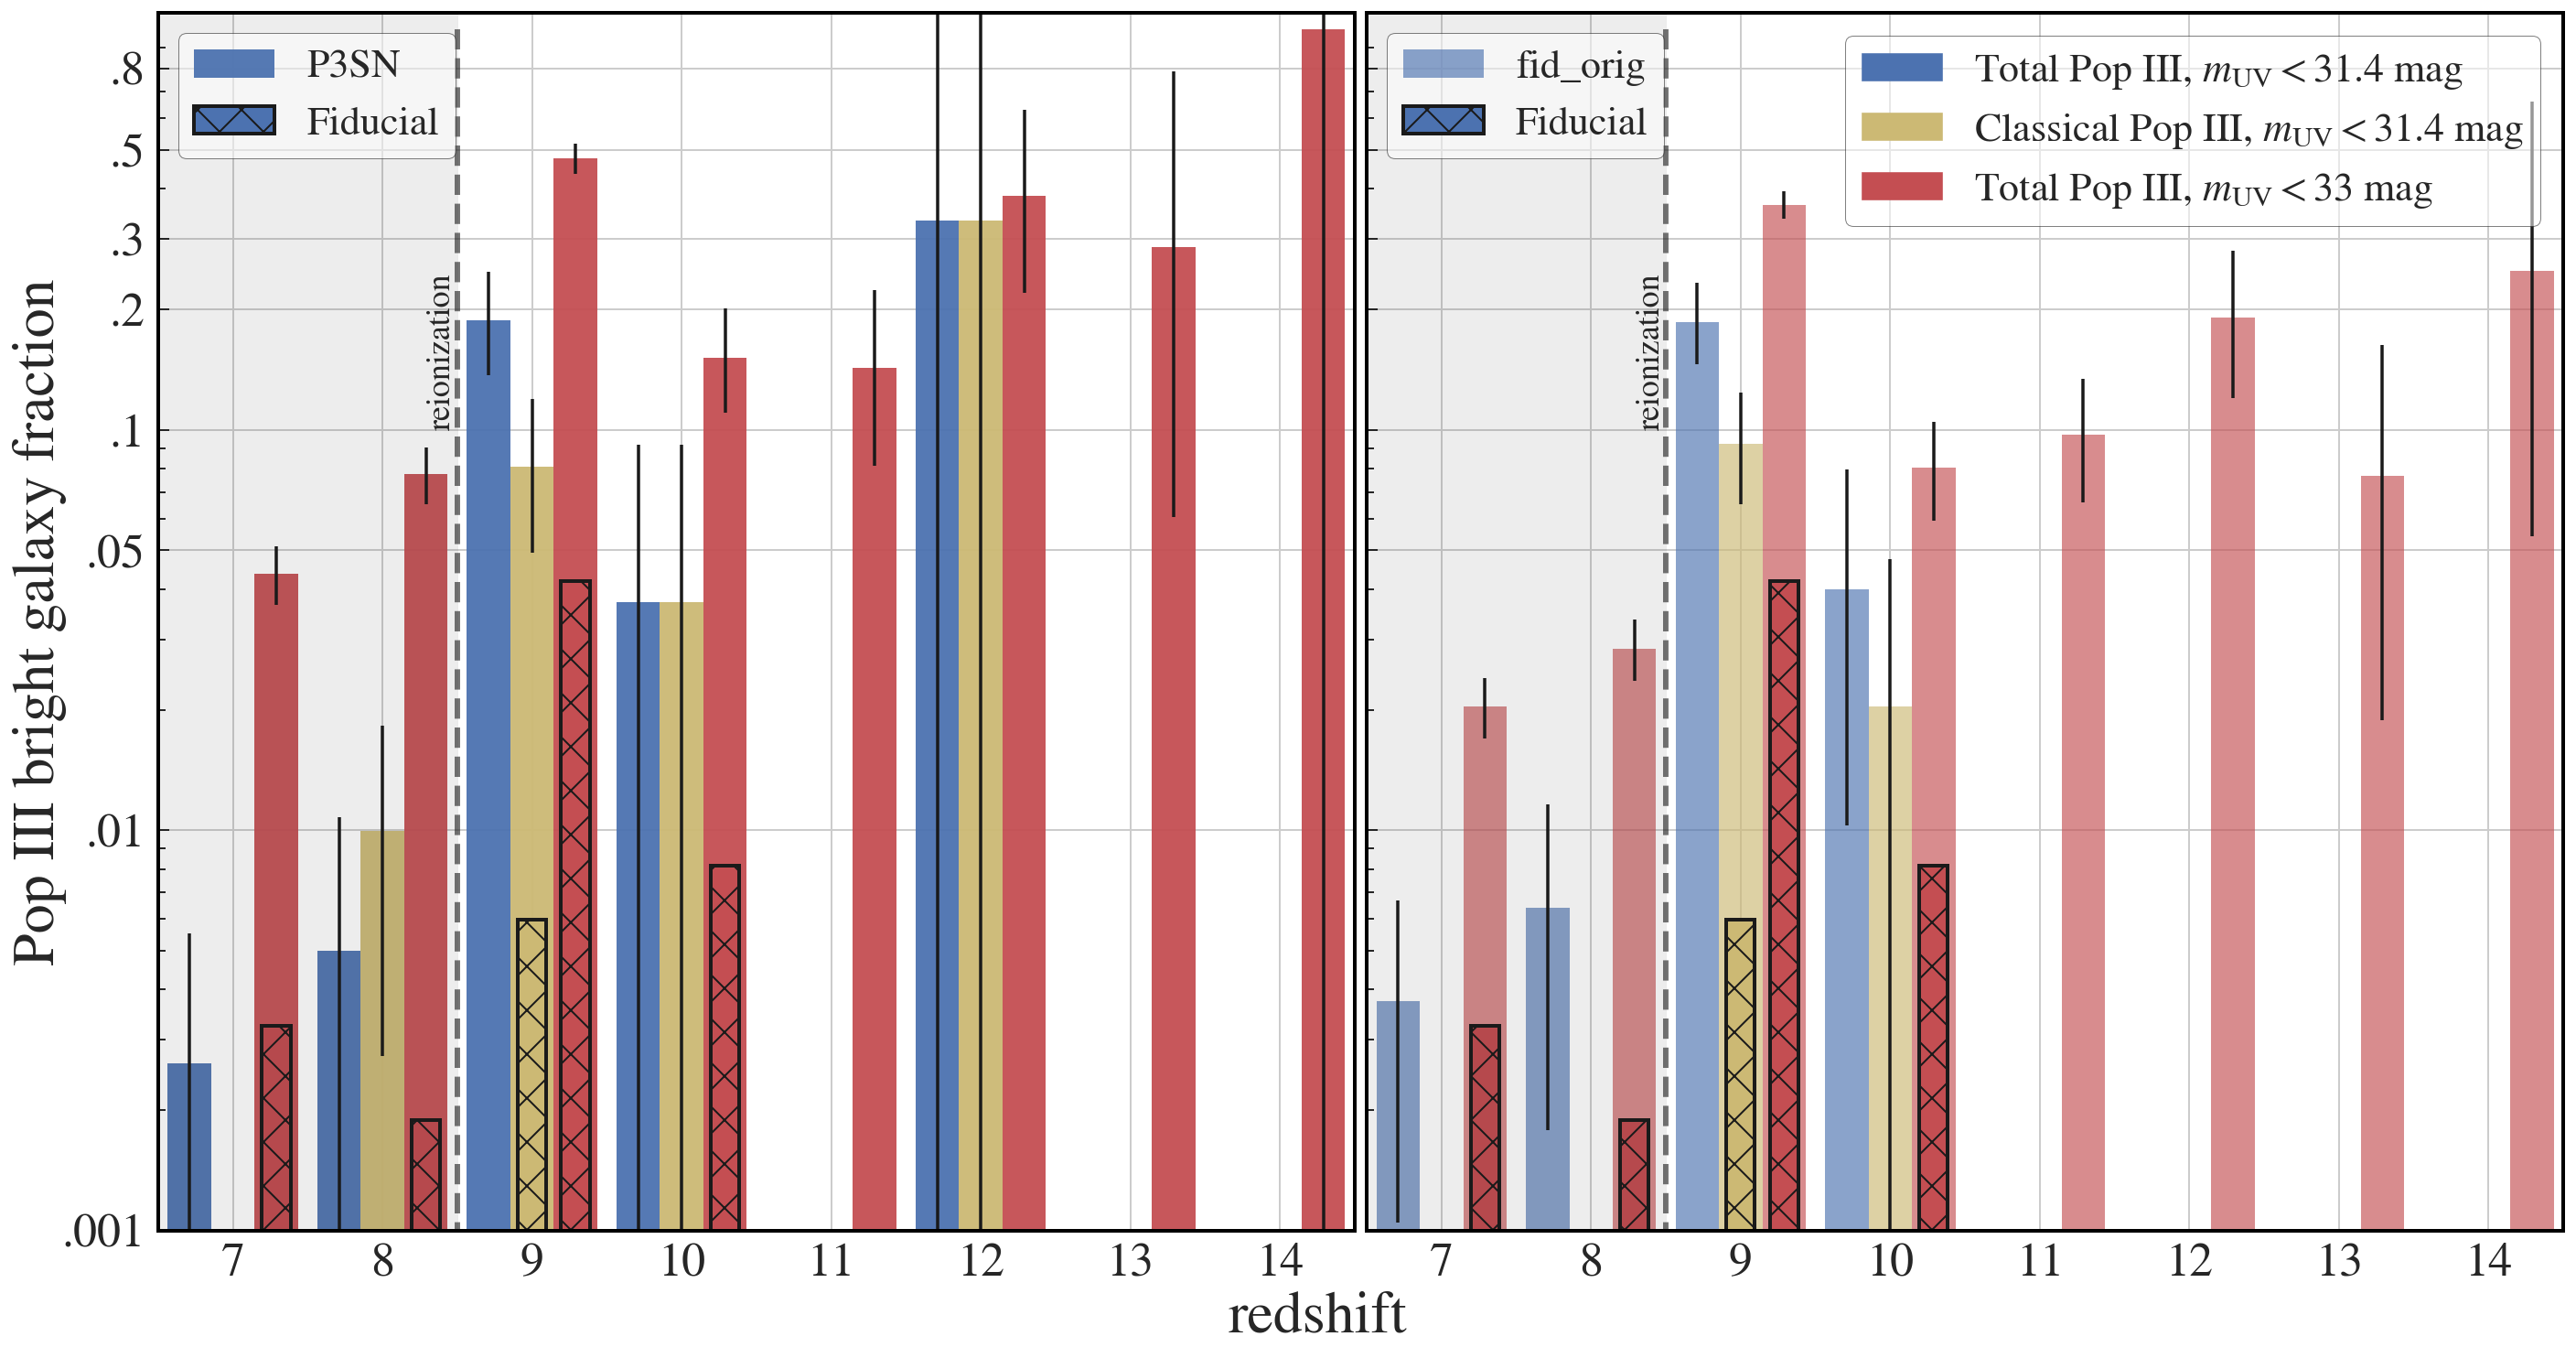

In [101]:
mpl.rcParams['hatch.color'] = 'k'
# Build and add a color legend for the types of data plotted
tot = mpatches.Patch(color='C0', label=r'Total Pop III, $m_{\rm UV}< 31.4$ mag')
p3  = mpatches.Patch(color='C4', label=r'Classical Pop III, $m_{\rm UV}< 31.4$ mag')
cp3 = mpatches.Patch(color='C2', label=r'Total Pop III, $m_{\rm UV} < 33$ mag')

colors = ['C0','C4','C2']
data_set_names = {'fid_orig':'fid_orig', 'P3SN':'P3SN'}
patterns = ('/', 'x', '.','\\')

wid   = 0.29 # Need to fit 3 in interval 0->1

fig, axs = plt.subplots(nrows=1, ncols=2, sharex='col',sharey='row',squeeze=True, figsize=(22,11))
for dir,ax,pat in zip(data_set_names.keys(), axs.flat,patterns):

    if dir == 'fid_orig':
        keyLeg = plt.legend(loc=(.4,.825), fontsize=22, handles=[tot, p3, cp3],framealpha=0.55, edgecolor='k')
        keyLeg.get_frame().set_linewidth(0.5)
        keyLeg.set_frame_on(True)
        plt.gca().add_artist(keyLeg)

    ax.set_yscale('log')

    if dir == 'fid_orig':
        al = .65
    else:
        al = .95
    ax.bar(P3B_obs_zs[dir]-wid,P3B_obs_fract[dir], wid, color='C0', alpha=al,
                   yerr=list(errsNormal[dir]), label=r'{}'.format(data_set_names[dir]))
    ax.bar(P3BNM_obs_zs[dir],P3BNM_obs_fract[dir], wid, color='C4',alpha=al, 
                    yerr=list(errsNM[dir]))
    ax.bar(P3B_dim_zs[dir]+wid,P3B_dim_fract[dir], wid, color='C2',alpha=al,
                   yerr=list(errsDim[dir]))
    
#     if dir == 'fid_orig':
    al = 1
#     else:
#         al = .45
    ax.bar(P3B_obs_zs['fid']-wid,P3B_obs_fract['fid'], wid-0.1, color='C0', alpha=al, edgecolor='k', lw=2.0,
           hatch='x', label=r'Fiducial',log=True) ## Seems we need this log=True to get the bars to appear ... 
    ax.bar(P3BNM_obs_zs['fid'],P3BNM_obs_fract['fid'], wid-0.1, color='C4',alpha=al, lw=2.0, 
           hatch='x', edgecolor='k')
    ax.bar(P3B_dim_zs['fid']+wid,P3B_dim_fract['fid'], wid-0.1, color='C2',alpha=al, lw=2.0, 
           hatch='x', edgecolor='k')



    ax.plot([8.5,8.5],[0,1], alpha=0.6, color='k', lw=3.0, ls='--')
    ax.axvspan(6.5,8.5, alpha=0.08, color='k')
    ax.annotate('reionization', xy = (0.5, 0.5), xytext = (8.3, .1), xycoords='axes fraction',
                            textcoords = 'data', ha = 'left', va = 'bottom',fontsize=18,rotation=90)

    ax.set_xlim([6.5,14.5])
    ax.set_ylim([0.001,1.1])
    ax.yaxis.set_major_formatter(logfmt)
    ax.yaxis.set_tick_params(which='major',width=1,length=6)
    ax.yaxis.set_tick_params(which='minor',width=1,length=4)
    ax.get_yaxis().set_tick_params(which='both', direction='in',labelsize=22)
    ax.set_xticks(np.arange(7,15))
    ax.set_yticks([1e-3,1e-2,5e-2,1e-1,.2,.3,.5,.8])
    ax.set_yticklabels(['.001','.01','.05','.1','.2','.3','.5','.8'])
    ax.tick_params(axis='both',labelsize=26)

    lk = ax.legend(loc=2, fontsize=22, scatterpoints= 1, 
                   framealpha=0.55, fancybox=True, edgecolor='k' )
    lk.get_frame().set_linewidth(0.5)
    lk.set_frame_on(True)
    

plt.subplots_adjust(left=0.05, bottom=0.08, right=.88, top=0.92, wspace=.01, hspace=.01)

# fig.text(0.5, 0.977,'Top middle', ha='center',size=28 )
fig.text(0.45, 0.01, 'redshift', ha='center',size=32 )
fig.text(0.00, 0.5, 'Pop III bright galaxy fraction',size=32,va='center', rotation='vertical')
    
fig.savefig("PopIII-brightAll-2new.pdf",dpi=fig.dpi,bbox_inches='tight')

In [37]:
errsNormal['P3SN'],errsNM['P3SN'],pop3_bright['P3SN'][11]

(array([[ 0.00323155,  0.0041737 ,  0.04268187,  0.03100208,  0.05882353,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.00351887,  0.00464795,  0.04957767,  0.04146127,  0.09649342,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ]]),
 array([[ 0.        ,  0.        ,  0.03103338,  0.03100208,  0.05882353,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.03630796,  0.04146127,  0.09649342,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ]]),
 0.058823529411764705)

In [35]:
#
# Increase in lensing opportunities for sim P3SN
#
P3B_dim_fract['p3SN']/P3B_dim_fract['fid'],((P3B_dim_fract['p3SN'][:7])/P3B_dim_fract['fid'][:7]).mean()

(array([   2.14054717,    2.7214326 ,    1.3032196 ,    1.88571429,    1.46938776,    2.01923077,    3.71428571,    4.        ,  166.66666667,    1.        ]),
 2.1791168418355462)

In [107]:
# Fractional reduction in Pop III bright for fig_orig/fid
(P3B_dim_fract['fid_orig']/P3B_dim_fract['fid'])[0:4].mean(),(P3B_dim_fract['fid_orig']/P3B_dim_fract['fid'])[0:4]

(9.98711219003616, array([ 6.28280019, 15.10429836,  8.70502838,  9.85632184]))

In [36]:
P3B_obs_zs['fid'],P3B_obs_fract['fid'],P3BNM_obs_fract['fid'],P3B_dim_fract['fid']

(array([  7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.]),
 array([ 0.006     ,  0.00641026,  0.18627451,  0.04      ,  0.006     ,  0.006     ,  0.006     ,  0.006     ,  0.006     ,  0.006     ]),
 array([ 0.006     ,  0.006     ,  0.0923913 ,  0.02040816,  0.006     ,  0.006     ,  0.006     ,  0.006     ,  0.006     ,  0.006     ]),
 array([ 0.0203987 ,  0.02844501,  0.36516357,  0.08045977,  0.09722222,  0.19047619,  0.07692308,  0.25      ,  0.006     ,  0.006     ]))

In [37]:
newSFRData = np.loadtxt("../12Mpc-n1.0-eps01-fek1-del200-rb300-newICs/part2sfr-Output-z_9.txt")

Text(0,0.5,'counts')

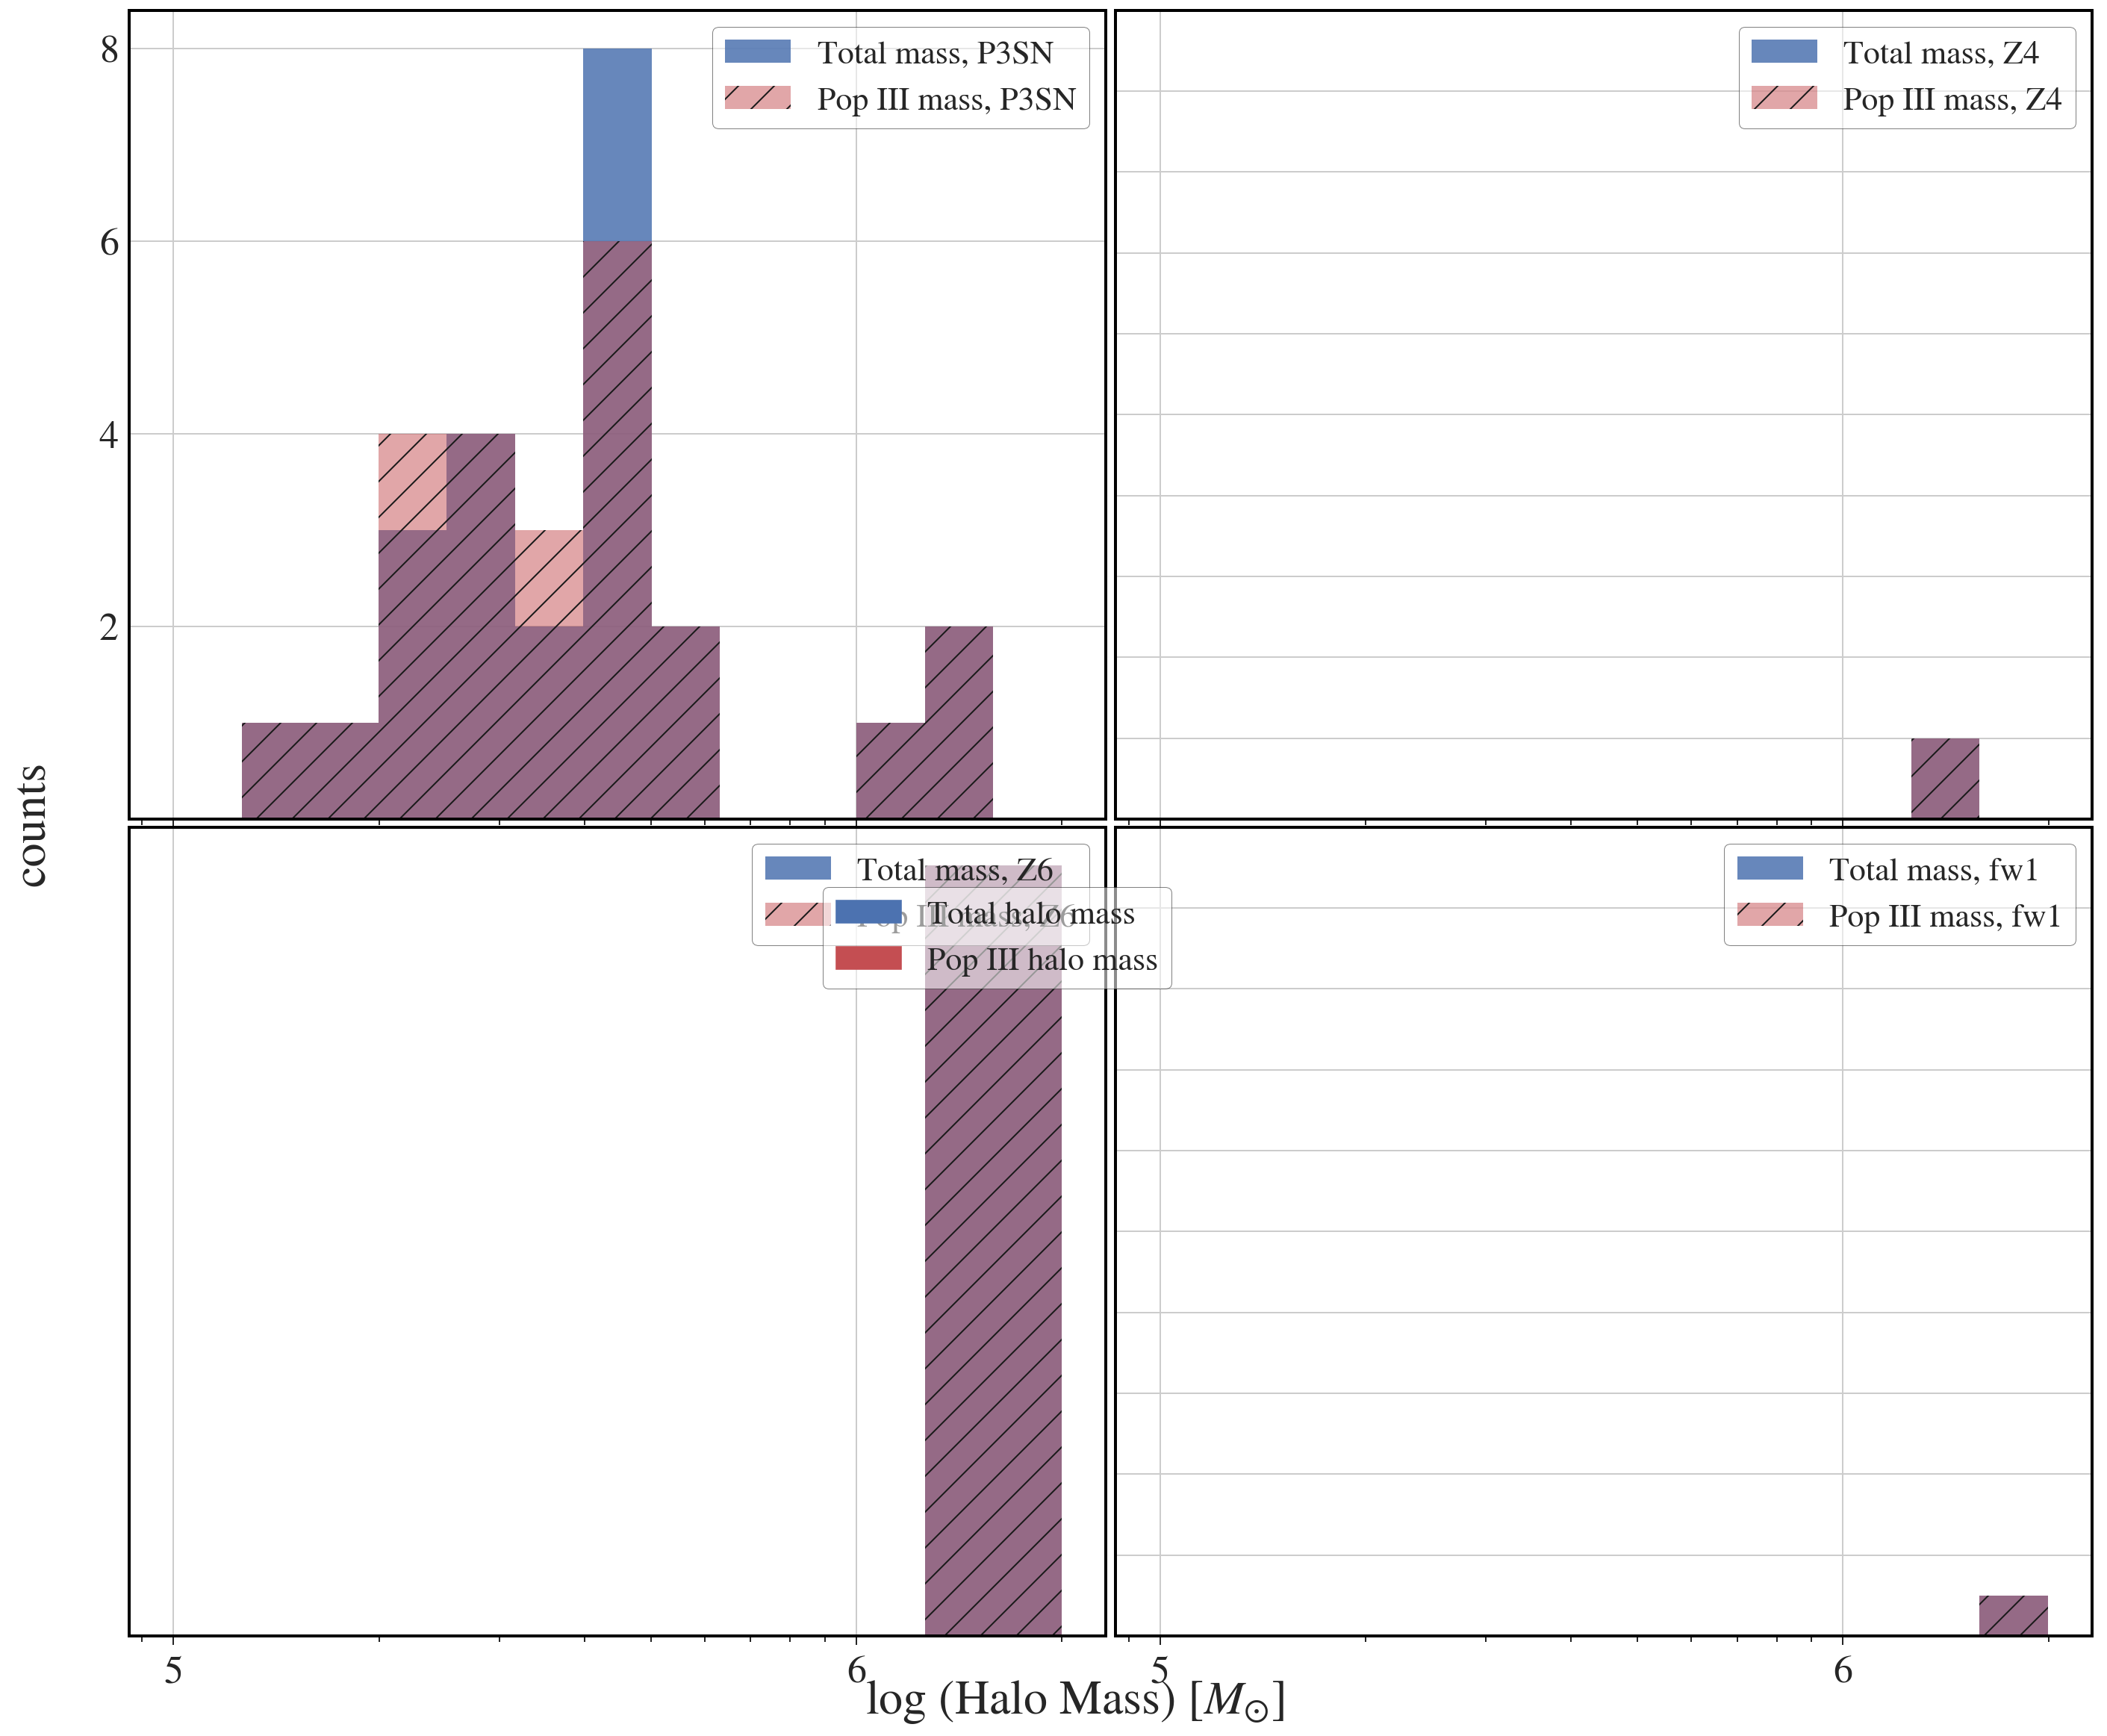

In [77]:
# Not very useful ... each halo ends up in a different bin because its' P3 and tot masses are different.

tot = mpatches.Patch(color='C0', label=r'Total halo mass')
p3  = mpatches.Patch(color='C2', label=r'Pop III halo mass')

data_set_names = {'fid':'fid', 'fid':'fid', 
                  'P3SN':'P3SN','P3SN':'P3SN'}
massBins = np.logspace(5,6.3,14)
fig, axs = plt.subplots(nrows=2, ncols=2, sharex='col',sharey='row',squeeze=True, figsize=(22,18))
for dir,ax in zip(sorted(data_set_names.keys()), axs.flat):

    if dir == 'P3SN':
        keyLeg = plt.legend(loc=(-.3,.8), fontsize=22, handles=[tot, p3],framealpha=0.55, edgecolor='k')
        keyLeg.get_frame().set_linewidth(0.5)
        keyLeg.set_frame_on(True)
        plt.gca().add_artist(keyLeg)

    ax.set_xscale('log')
#     ax.set_yscale('log')

    ### 
    ### The Pop III mass of a halo and its total mass end up in different bins, obviously...
    ###
    ax.hist(haloData[dir][9][cond(dir,p3ff,9,0.75,limMag,mags)]['MstarMsun'], bins=massBins, alpha=0.85, color='C0',
            label=r'Total mass, {}'.format(data_set_names[dir]))
    ax.hist(haloData[dir][9][cond(dir,p3ff,9,0.75,limMag,mags)]['M3StarMsun'], bins=massBins, alpha=0.5, color='C2',
            label=r'Pop III mass, {}'.format(data_set_names[dir]), hatch='/')


#     ax.set_xlim([6.5,14.5])
#     ax.set_ylim([0.008,1.1])
    ax.xaxis.set_major_formatter(logfmt)
    ax.xaxis.set_tick_params(which='major',width=1,length=6)
    ax.xaxis.set_tick_params(which='minor',width=1,length=4)
#     ax.get_yaxis().set_tick_params(which='both', direction='in',labelsize=22)
#     ax.set_xticks(np.arange(7,15))
    ax.set_yticks([2,4,6,8,10,12,14,16,18,20])
#     ax.set_yticklabels(['.01','.05','.1','.2','.3','.5','.8'])
    ax.tick_params(axis='both',labelsize=26)

    lk = ax.legend(loc=1, fontsize=22, framealpha=0.55, fancybox=True, edgecolor='k' )
    lk.get_frame().set_linewidth(0.5)
    lk.set_frame_on(True)
    

plt.subplots_adjust(left=0.05, bottom=0.08, right=.88, top=0.92, wspace=.01, hspace=.01)

# fig.text(0.5, 0.977,'Top middle', ha='center',size=28 )
fig.text(0.45, 0.04, 'log (Halo Mass) [$M_{\odot}$]', ha='center',size=32 )
fig.text(0.00, 0.5, 'counts',size=32,va='center', rotation='vertical')
    
# fig.savefig("PopIII-brightAll-mf-4.pdf",dpi=fig.dpi,bbox_inches='tight')

In [39]:
((haloData['P3SN'][9][cond('P3SN',p3ff,9,0.75,limMag,mags)]['MstarMsun']-haloData['P3SN'][9][cond('P3SN',p3ff,9,0.75,limMag,mags)]['M3StarMsun']) < 0.0).nonzero()[0]

array([], dtype=int64)

In [40]:
haloData[dir][9][cond(dir,p3ff,9,0.75,limMag,mags)]['M3StarMsun']/ \
            haloData[dir][9][cond(dir,p3ff,9,0.75,limMag,mags)]['MstarMsun']

array([ 0.98377724,  0.93958013,  0.99750934,  1.        ,  0.95568983,  0.99483871,  1.        ,  0.99956971,  1.        ,  1.        ,  1.        ,  0.967457  ,
        1.        ,  0.99043744,  0.96348247,  0.9991453 ,  0.67033312,  0.99628988,  0.81991814,  0.9943662 ,  0.9886393 ,  1.        ,  1.        ,  0.85378894])

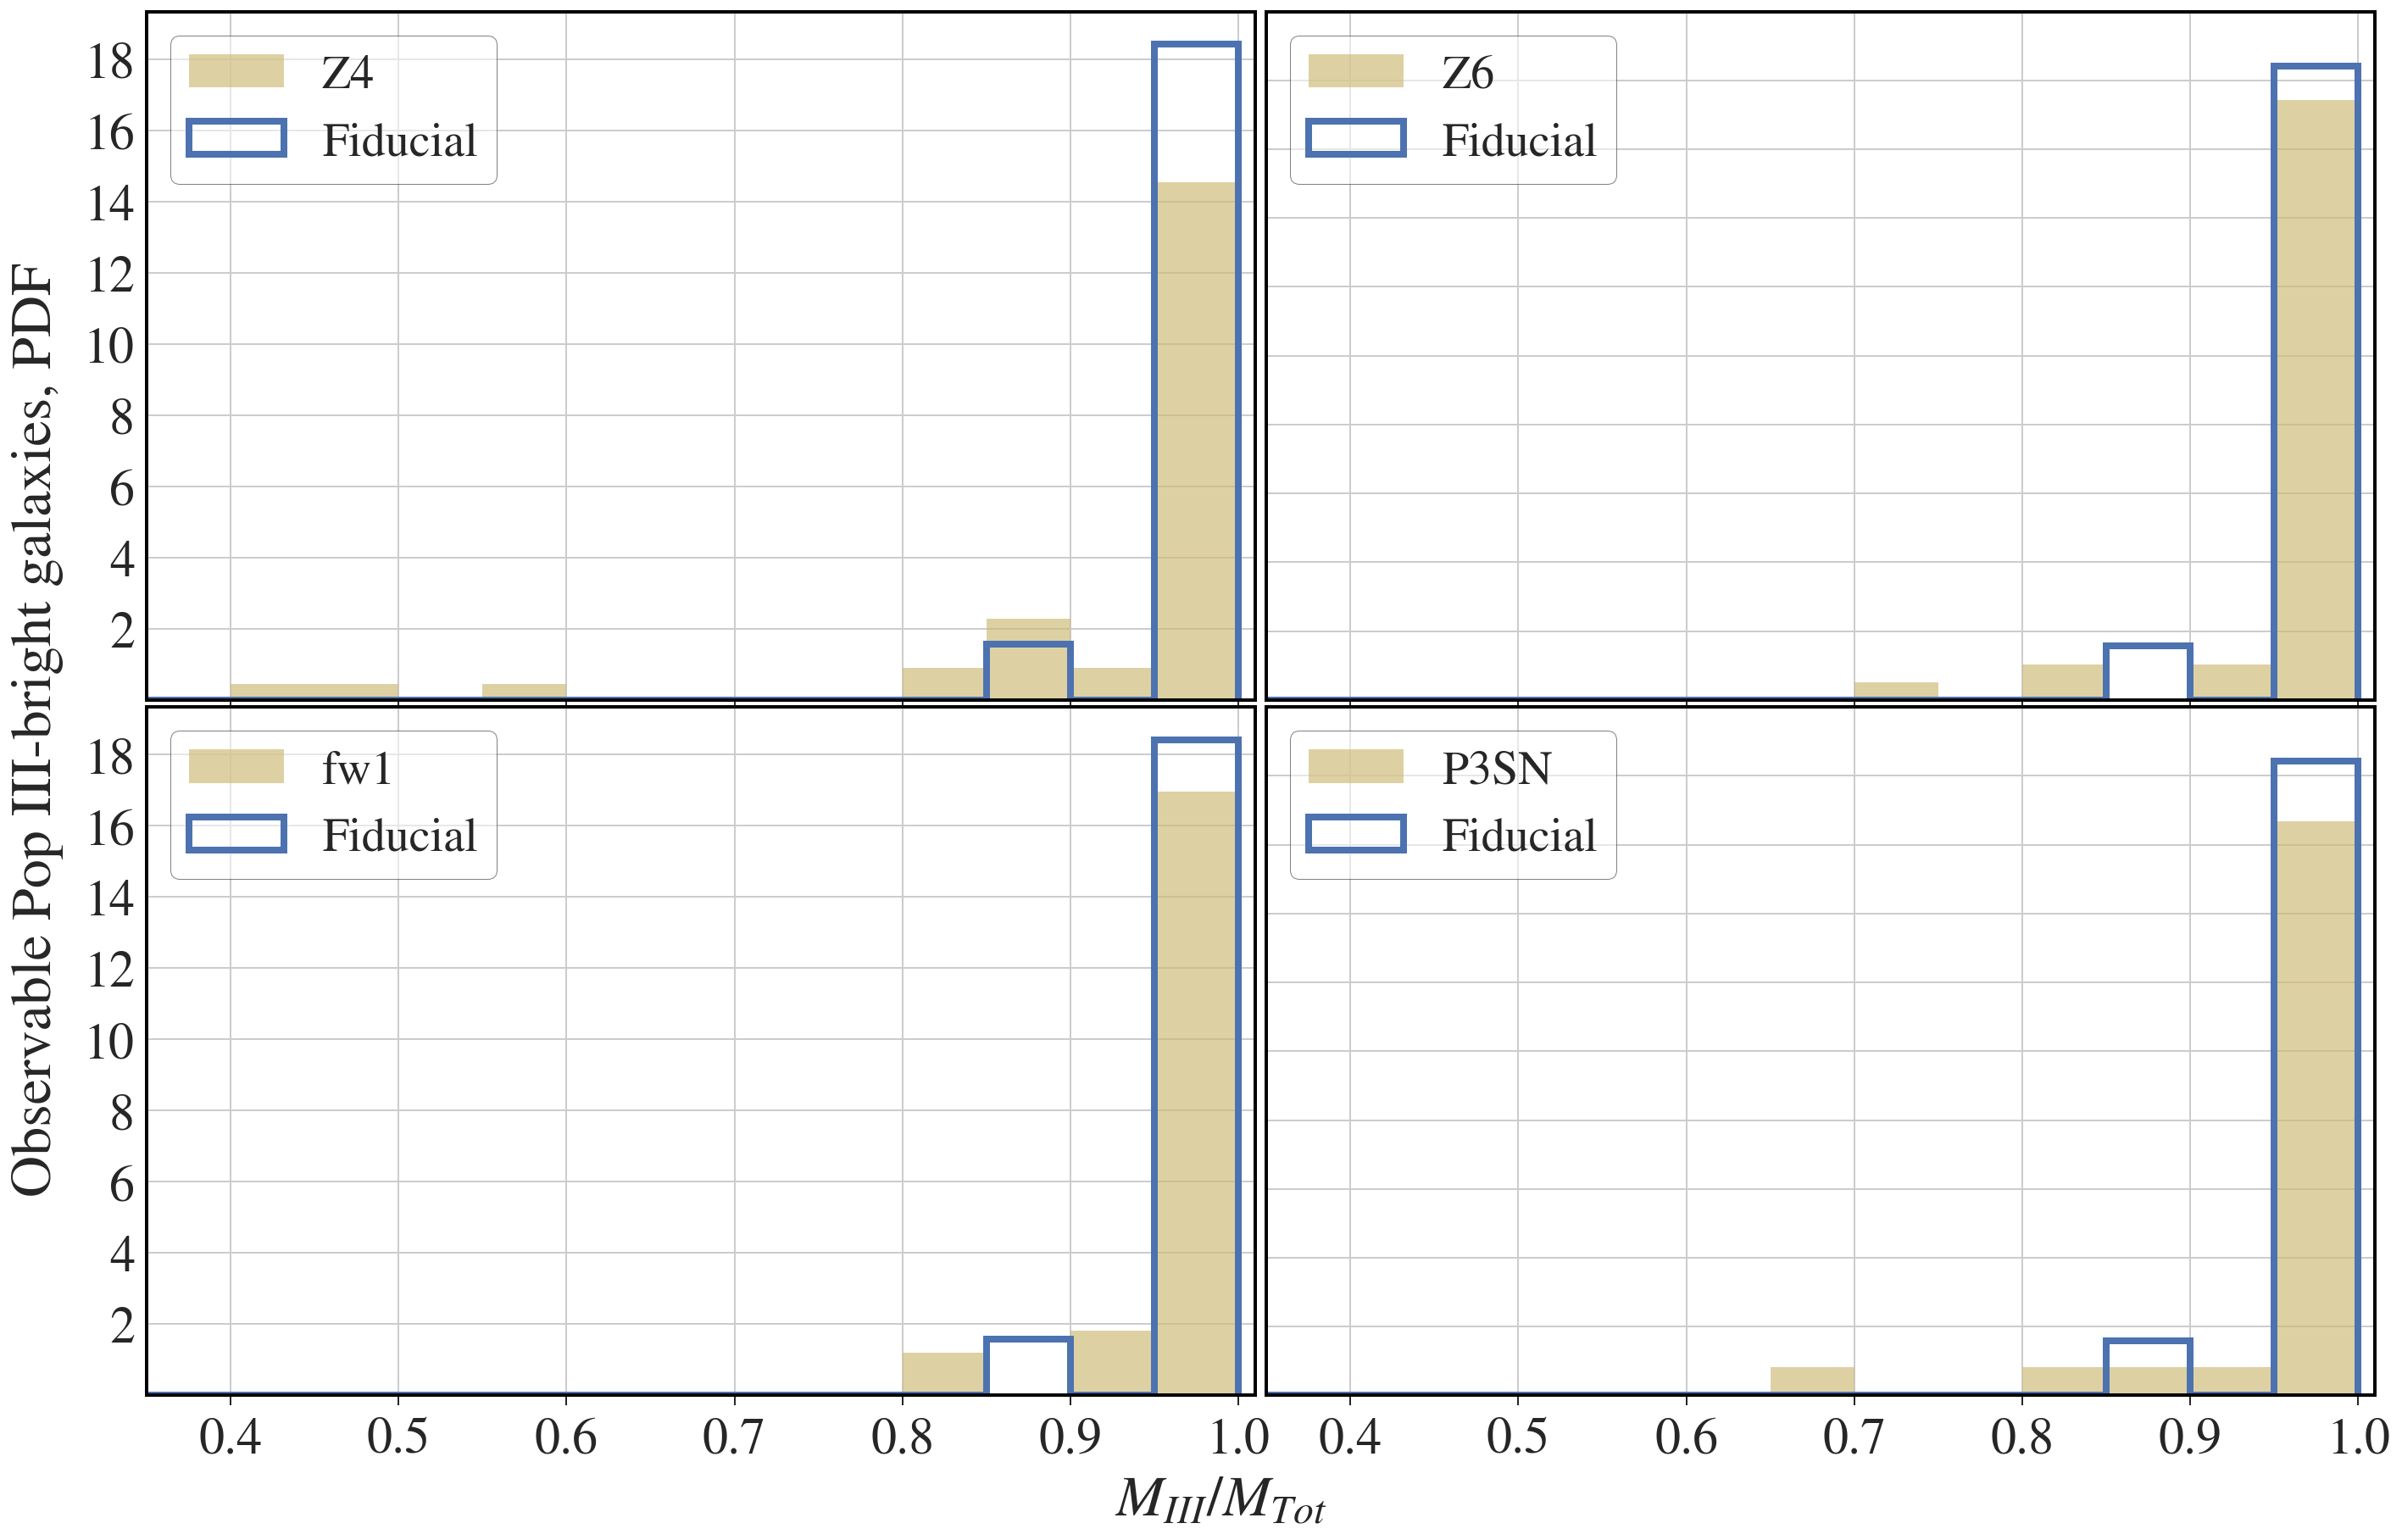

In [41]:
# Create histogram of masses of P3 bright galaxes ...this is the way to do it... 
# Plot the fraction of Pop III mass, binned

tot = mpatches.Patch(color='C0', label=r'Total halo mass')
p3  = mpatches.Patch(color='C2', label=r'Pop III halo mass')

data_set_names = {'fid':'fid', 'fid':'fid', 
                  'P3SN':'P3SN','p3SN':'P3SN'}
massBins = np.logspace(-1,0,21)
massBins = np.linspace(.0,1,21)
fig, axs = plt.subplots(nrows=2, ncols=2, sharex='col',sharey='row',squeeze=True, figsize=(22,14))
for dir,ax in zip(sorted(data_set_names.keys()), axs.flat):
    if dir == 'P3SN':
        keyLeg = plt.legend(loc=(-.3,.8), fontsize=22, handles=[tot, p3],framealpha=0.65, edgecolor='k')
        keyLeg.get_frame().set_linewidth(0.5)
        keyLeg.set_frame_on(True)
        plt.gca().add_artist(keyLeg)

#     ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.hist(haloData[dir][9][cond(dir,p3ff,9,0.75,limMag,mags)]['M3StarMsun']/ haloData[dir][9][cond(dir,p3ff,9,0.75,limMag,mags)]['MstarMsun'],
            bins=massBins, alpha=0.65, color='C4', density=True, 
            label=r'{}'.format(data_set_names[dir]))

    ax.hist(haloData['fid'][9][cond('fid',p3ff,9,0.75,limMag,mags)]['M3StarMsun']/ haloData['fid'][9][cond('fid',p3ff,9,0.75,limMag,mags)]['MstarMsun'],
            bins=massBins, alpha=1, color='C0', density=True, histtype='step', lw=4, 
            label=r'{}'.format('Fiducial'))

    if dir == 'fid' or dir == 'fid':
        ax.tick_params(axis='x',which='both',bottom=False, top=False )
    else:
        ax.tick_params(axis='x',which='both',bottom=True, top=False )

    ax.set_xlim([0.35,1.01])
#     ax.set_ylim([0.008,1.1])
#     ax.xaxis.set_major_formatter(logfmt)
    ax.xaxis.set_tick_params(which='major',width=1,length=6)
    ax.xaxis.set_tick_params(which='minor',width=1,length=4)
    ax.get_yaxis().set_tick_params(which='both', direction='in',labelsize=22)
#     ax.set_xticks(np.arange(7,15))
    ax.set_yticks([2,4,6,8,10,12,14,16,18,20])
#     ax.set_yticklabels(['.01','.05','.1','.2','.3','.5','.8'])
    ax.tick_params(axis='both',labelsize=30)

    lk = ax.legend(loc=2, fontsize=28, framealpha=0.55, fancybox=True, edgecolor='k' )
    lk.get_frame().set_linewidth(0.5)
    lk.set_frame_on(True)
    

plt.subplots_adjust(left=0.05, bottom=0.11, right=.88, top=0.92, wspace=.01, hspace=.01)

# fig.text(0.5, 0.977,'Top middle', ha='center',size=28 )
fig.text(0.45, 0.04, '$M_{III}/M_{Tot}$', ha='center',size=34 )
fig.text(0.00, 0.5, 'Observable Pop III-bright galaxies, PDF',size=34,va='center', rotation='vertical')
    
fig.savefig("PopIII-brightAll-mf-z9.pdf",dpi=fig.dpi,bbox_inches='tight')

0
fid
Z-4
Z-6
fw1
p3SN


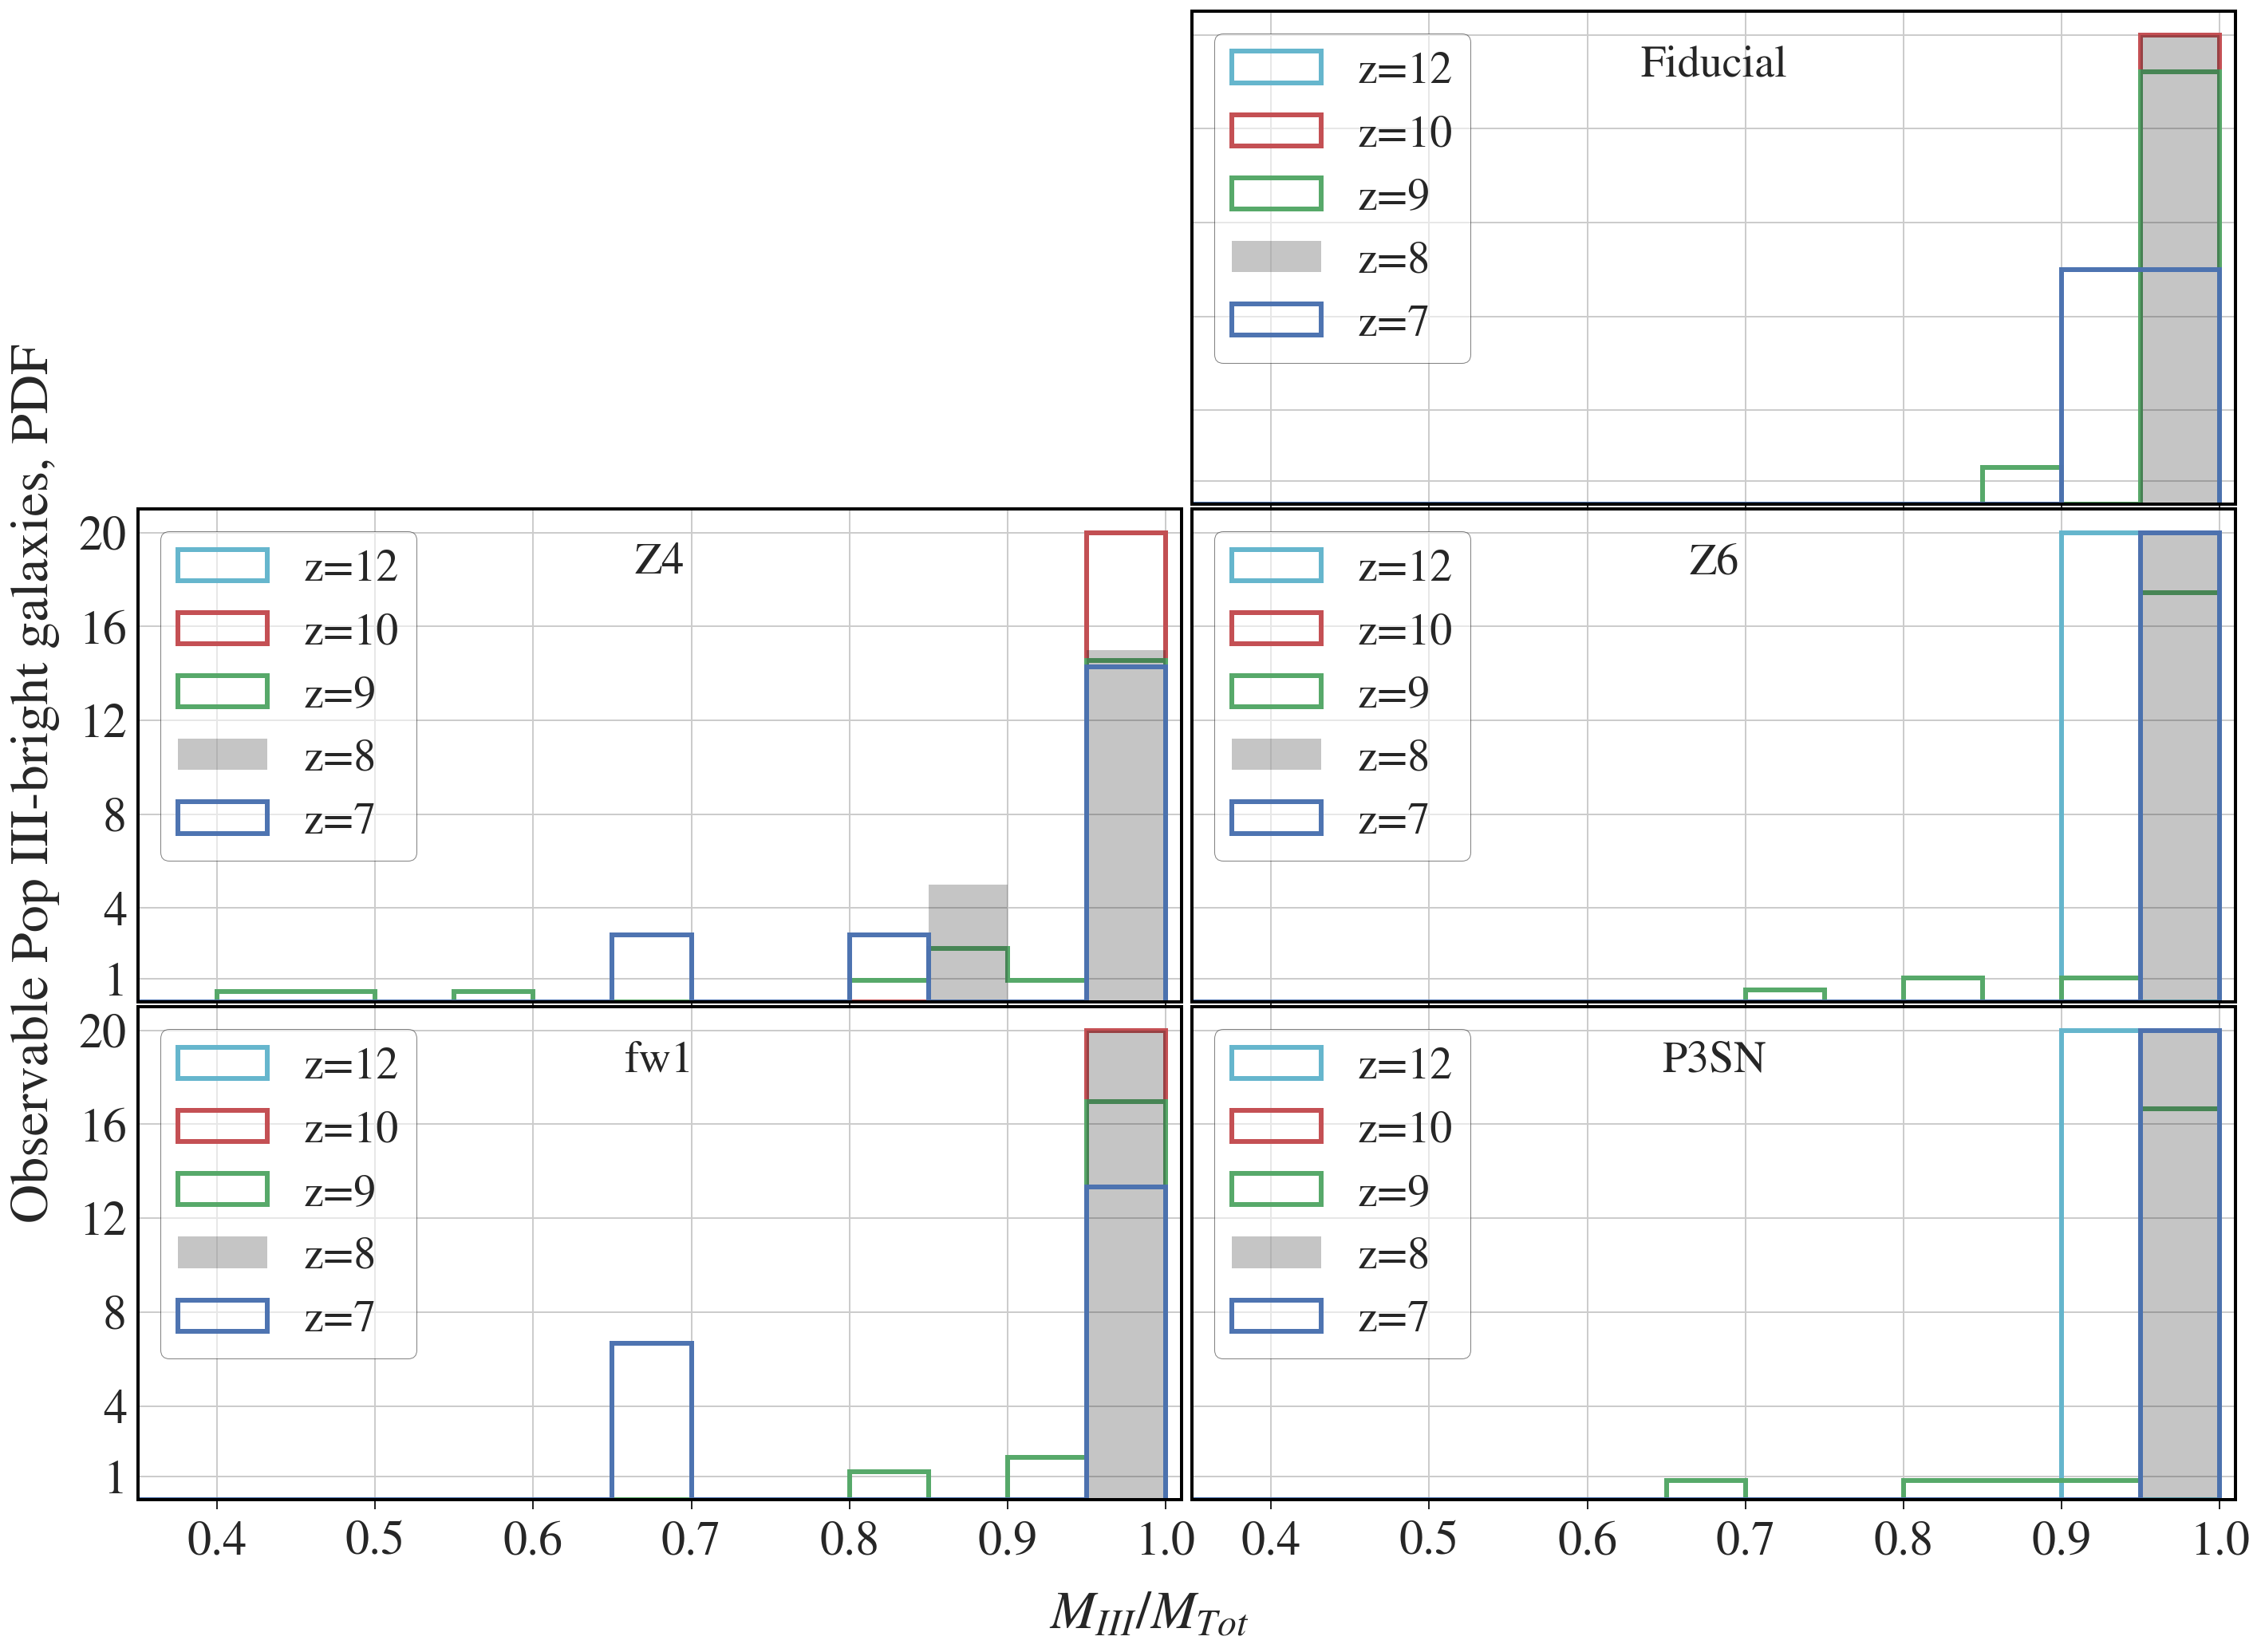

In [42]:
# Create histogram of masses of P3 bright galaxes ...this is the way to do it... 
# Plot the fraction of Pop III mass, binned

tot = mpatches.Patch(color='C0', label=r'Total halo mass')
p3  = mpatches.Patch(color='C2', label=r'Pop III halo mass')

data_set_names = { 0:0,'fid':'fid', 'fid':'fid', 
                  'P3SN':'P3SN','p3SN':'P3SN', 'fid':'Fiducial'}
massBins = np.linspace(.0,1,21)
fig, axs = plt.subplots(nrows=3, ncols=2, sharex='col',sharey='row',squeeze=True, figsize=(22,16))
axs[0, 0].axis('off')
# axs[2, 1].axis('off')
for dir,ax in zip([0, 'fid', 'fid', 'fid', 'P3SN','p3SN'], axs.flat):
    print(dir)
    if dir == 0:
        continue
    for z,c in zip([12,10,9,8,7],['C5','C2','C1','C0','C6']):
#         if dir == 'P3SN':
#             keyLeg = plt.legend(loc=(-.3,.8), fontsize=22, handles=[tot, p3],framealpha=0.65, edgecolor='k')
#             keyLeg.get_frame().set_linewidth(0.5)
#             keyLeg.set_frame_on(True)
#             plt.gca().add_artist(keyLeg)

    #     ax.set_xscale('log')
    #     ax.set_yscale('log')
#         ax.hist(haloData['fid'][z][cond('fid',p3ff,z,0.75,limMag,mags)]['M3StarMsun']/ haloData['fid'][z][cond('fid',p3ff,z,0.75,limMag,mags)]['MstarMsun'],
#                 bins=massBins, alpha=0.25, color='k', density=True, #histtype='step', lw=4, ls=ls2, hatch=p,
#                 label=r'z={}, {}'.format(z,'Fiducial'))
        if z == 8:
            ax.hist(haloData[dir][z][cond(dir,p3ff,z,0.75,limMag,mags)]['M3StarMsun']/ haloData[dir][z][cond(dir,p3ff,z,0.75,limMag,mags)]['MstarMsun'],
                bins=massBins, alpha=0.25, color='k', density=True, # histtype='step', lw=3, ls=ls1,
                label=r'z={}'.format(z))
            ax.annotate("{}".format(data_set_names[dir]), xy = (0.5, 0.5), xytext = (.5, .85), xycoords='axes fraction',
                            textcoords = 'axes fraction', ha = 'center', va = 'bottom',fontsize=28,rotation=0)
        else:
            ax.hist(haloData[dir][z][cond(dir,p3ff,z,0.75,limMag,mags)]['M3StarMsun']/ haloData[dir][z][cond(dir,p3ff,z,0.75,limMag,mags)]['MstarMsun'],
                bins=massBins, alpha=0.99, color=c, density=True, histtype='step', lw=3, ls='-',
                label=r'z={}'.format(z))
    
        
        if dir == 'fid' or dir == 'fid':
            ax.tick_params(axis='x',which='both',bottom=False, top=False )
        else:
            ax.tick_params(axis='x',which='both',bottom=True, top=False )

        ax.set_xlim([0.35,1.01])
    #     ax.set_ylim([0.008,1.1])
    #     ax.xaxis.set_major_formatter(logfmt)
        ax.xaxis.set_tick_params(which='major',width=1,length=6)
        ax.xaxis.set_tick_params(which='minor',width=1,length=4)
        ax.get_yaxis().set_tick_params(which='both', direction='in',labelsize=22)
    #     ax.set_xticks(np.arange(7,15))
        ax.set_yticks([1,4,8,12,16,20])
    #     ax.set_yticklabels(['.01','.05','.1','.2','.3','.5','.8'])
        ax.tick_params(axis='both',labelsize=30)

        lk = ax.legend(loc=2, fontsize=28, framealpha=0.55, fancybox=True, edgecolor='k' )
        lk.get_frame().set_linewidth(0.5)
        lk.set_frame_on(True)
    

plt.subplots_adjust(left=0.05, bottom=0.11, right=.88, top=0.92, wspace=.01, hspace=.01)

# fig.text(0.5, 0.977,'Top middle', ha='center',size=28 )
fig.text(0.45, 0.04, '$M_{III}/M_{Tot}$', ha='center',size=34 )
fig.text(0.00, 0.5, 'Observable Pop III-bright galaxies, PDF',size=34,va='center', rotation='vertical')
    
fig.savefig("PopIII-brightP3-mf-89.pdf",dpi=fig.dpi,bbox_inches='tight')

In [45]:
data_set_names.keys()

dict_keys([0, 'Z-4', 'fid', 'Z-6', 'p3SN', 'fw1'])

fid
0
Z-4
Z-6
fw1
p3SN


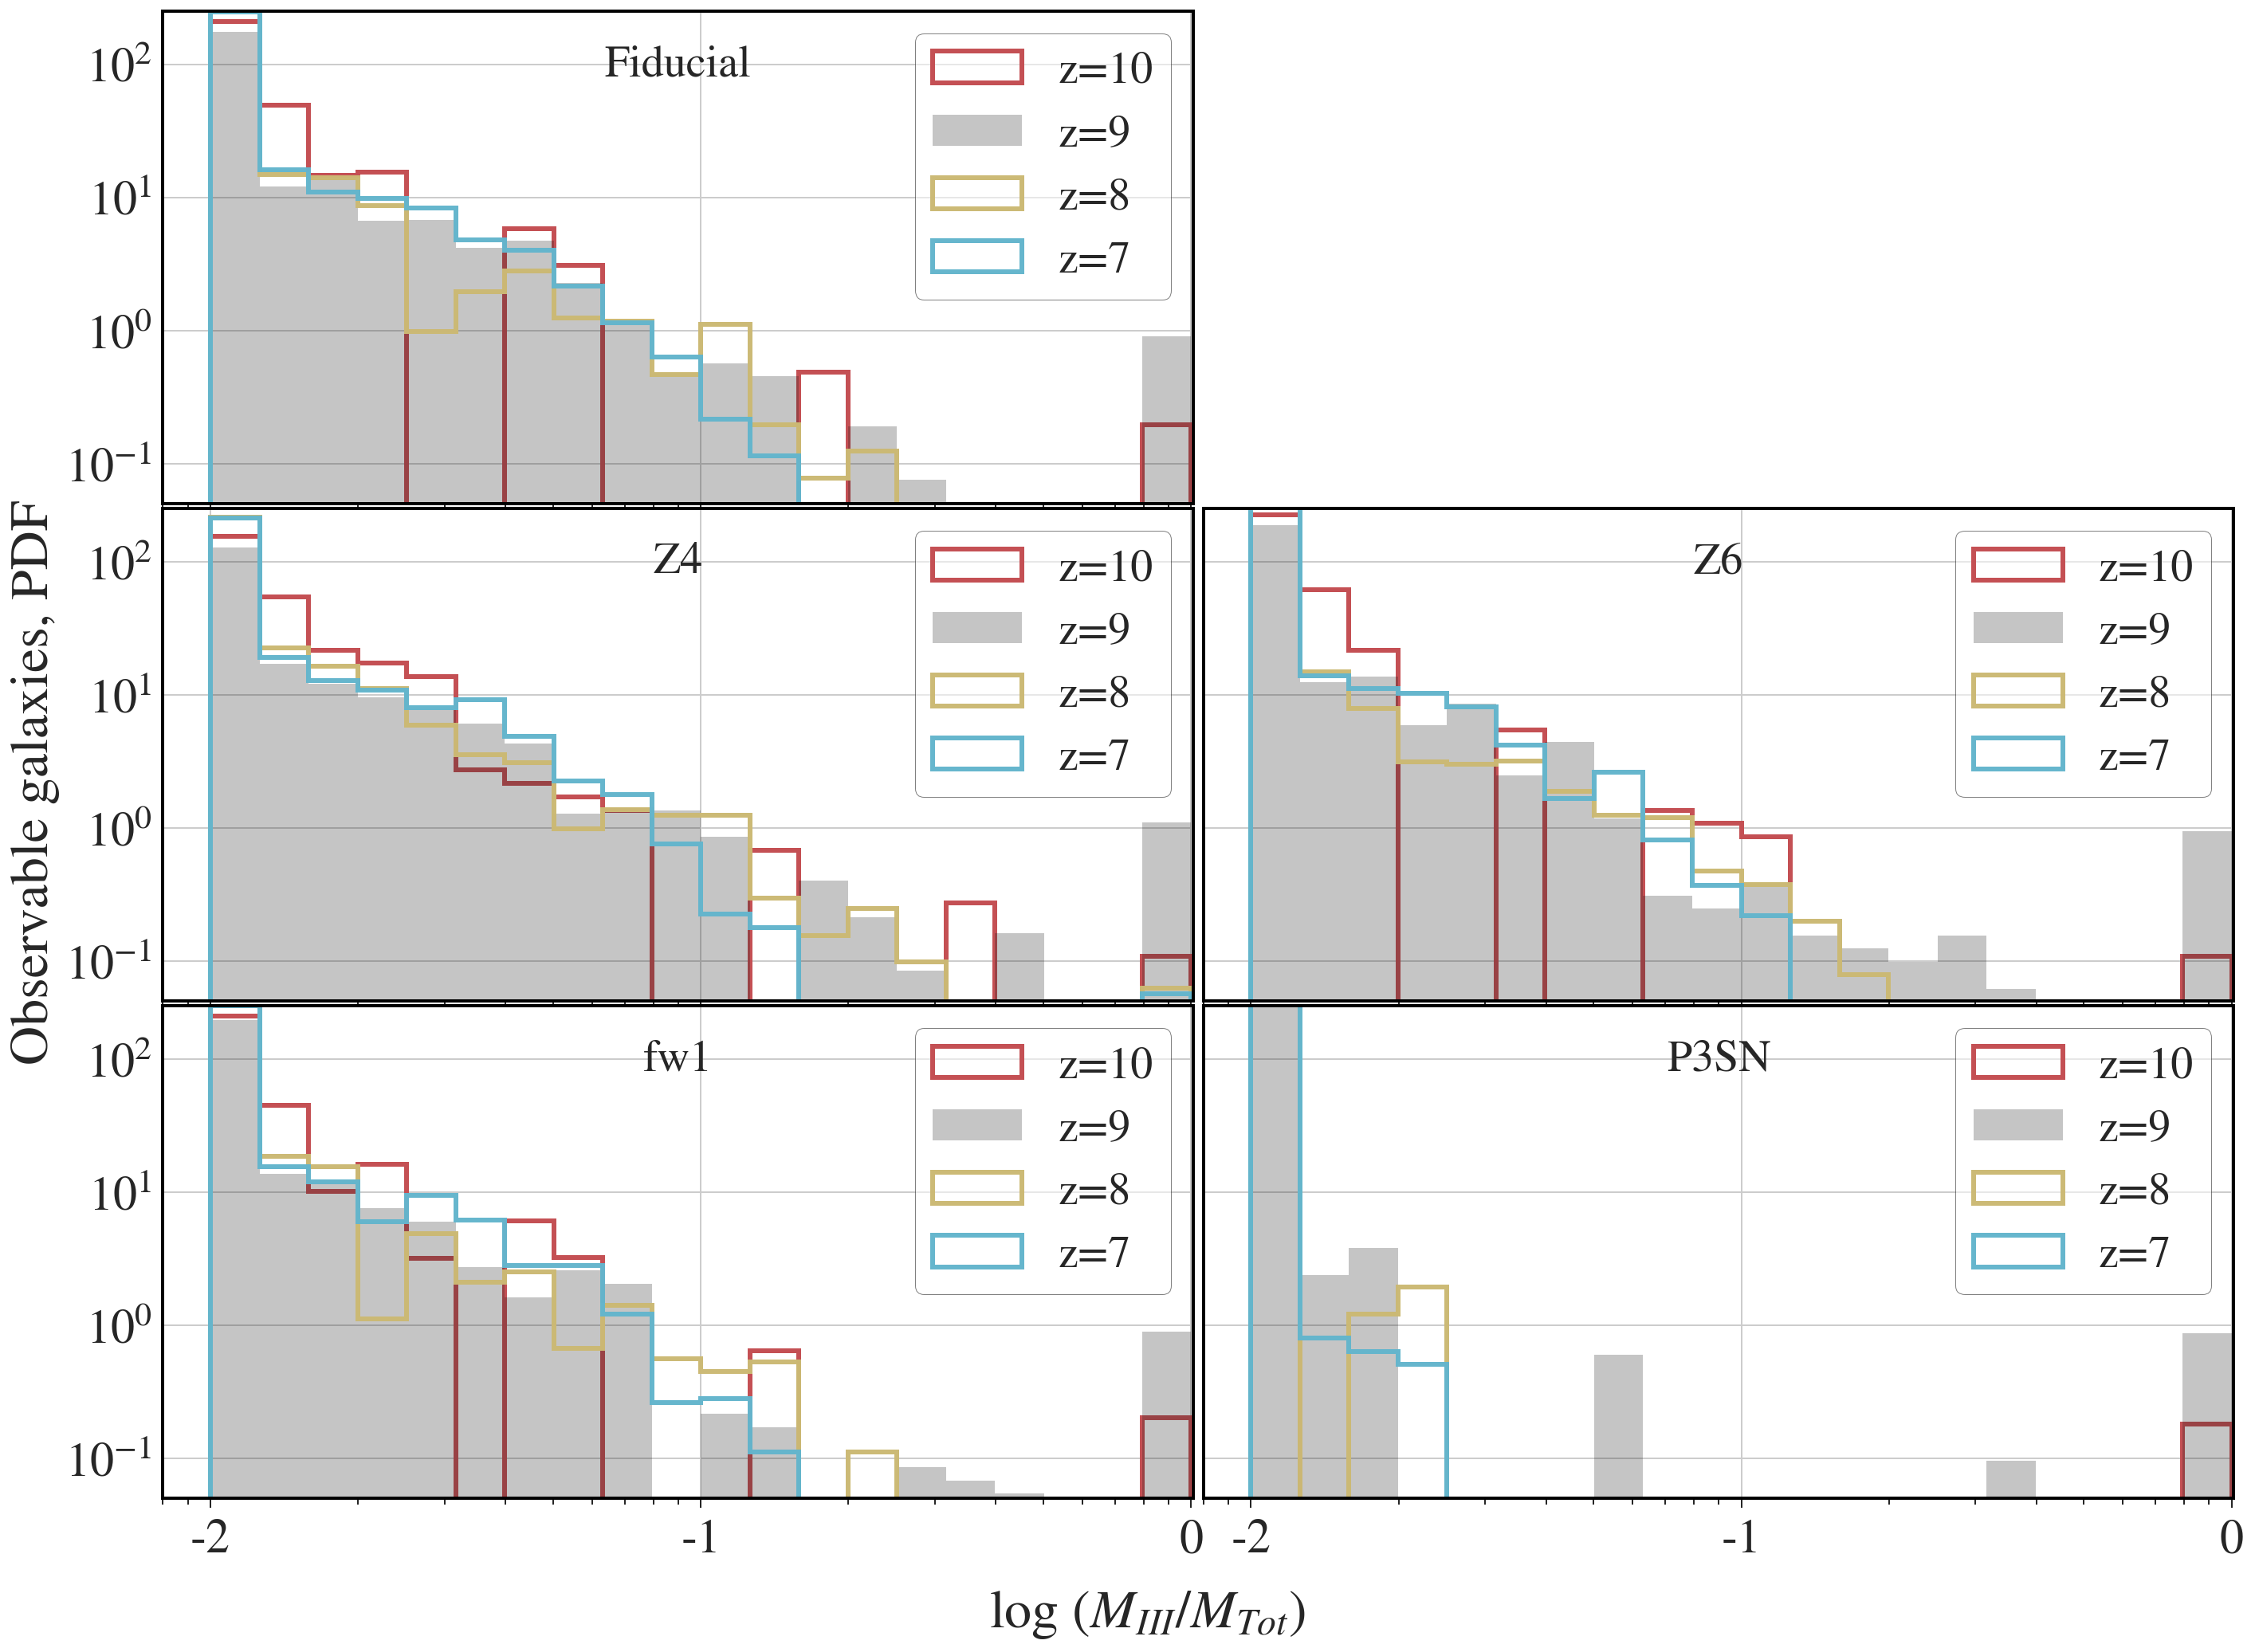

In [46]:
# Create histogram of masses of bright galaxes ...this is the way to do it... 
# Plot the fraction of Pop III mass, binned

tot = mpatches.Patch(color='C0', label=r'Total halo mass')
p3  = mpatches.Patch(color='C2', label=r'Pop III halo mass')

data_set_names = { 0:0,'fid':'fid', 'fid':'fid', 
                  'P3SN':'P3SN','p3SN':'P3SN', 'fid':'Fiducial'}
massBins = np.logspace(-2,0,21)
fig, axs = plt.subplots(nrows=3, ncols=2, sharex='col',sharey='row',squeeze=True, figsize=(22,16))
axs[0, 1].axis('off')
# axs[2, 1].axis('off')
for dir,ax in zip(['fid', 0, 'fid', 'fid', 'P3SN','p3SN'], axs.flat):
    print(dir)
    if dir == 0:
        continue
#     for z,c in zip([12,10,9,8,7],['C5','C2','C1','C0','C6']):
    for z,c in zip([10,9,8,7],['C2','C1','C4','C5','C6','C3']):

        obsGals_P3Mass = haloData[dir][z][cond(dir,p3ff,z,0.0,limMag,mags)]['M3StarMsun']
        obsGals_TotMass= haloData[dir][z][cond(dir,p3ff,z,0.0,limMag,mags)]['MstarMsun']
        
        obsGalsP3Tot_ratio = obsGals_P3Mass/obsGals_TotMass
        obsGalsP3Tot_ratio[obsGalsP3Tot_ratio < 0.01] = 0.01
        
        if z == 9:
            ax.hist(obsGalsP3Tot_ratio,
                bins=massBins, alpha=0.25, color='k', density=True, # histtype='step', lw=3, ls=ls1,
                label=r'z={}'.format(z))
            ax.annotate("{}".format(data_set_names[dir]), xy = (0.5, 0.5), xytext = (.5, .85), xycoords='axes fraction',
                            textcoords = 'axes fraction', ha = 'center', va = 'bottom',fontsize=28,rotation=0)
        else:
            ax.hist(obsGalsP3Tot_ratio,
                bins=massBins, alpha=0.99, color=c, density=True, histtype='step', lw=3, ls='-',
                label=r'z={}'.format(z))
    
        
        if dir == 'fid' or dir == 'fid':
            ax.tick_params(axis='x',which='both',bottom=False, top=False )
        else:
            ax.tick_params(axis='x',which='both',bottom=True, top=False )

        if dir == 'fid':
            for tk in ax.get_yticklabels():
                tk.set_visible(True)

        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim([8e-3,1.01])
        ax.set_ylim([0.05,250])
        ax.xaxis.set_major_formatter(logfmt)
        ax.xaxis.set_tick_params(which='major',width=1,length=6)
        ax.xaxis.set_tick_params(which='minor',width=1,length=4)
        ax.get_yaxis().set_tick_params(which='both', direction='in',labelsize=22)
    #     ax.set_xticks(np.arange(7,15))
#         ax.set_yticks([1,2,5,10,20,30,50,80,100])
    #     ax.set_yticklabels(['.01','.05','.1','.2','.3','.5','.8'])
        ax.tick_params(axis='both',labelsize=30)

        lk = ax.legend(loc=1, fontsize=28, framealpha=0.55, fancybox=True, edgecolor='k' )
        lk.get_frame().set_linewidth(0.5)
        lk.set_frame_on(True)
    

plt.subplots_adjust(left=0.06, bottom=0.11, right=.88, top=0.92, wspace=.01, hspace=.01)

# fig.text(0.5, 0.977,'Top middle', ha='center',size=28 )
fig.text(0.45, 0.04, 'log ($M_{III}/M_{Tot}$)', ha='center',size=34 )
fig.text(0.00, 0.5, 'Observable galaxies, PDF',size=34,va='center', rotation='vertical')
    
plt.savefig("PopIII-brightAll-mf-89.pdf",dpi=fig.dpi,bbox_inches='tight')

In [174]:
haloData['p3SN'][z][cond('p3SN',p3ff,9,0.0,limMag,mags)]['M3StarMsun'].size, haloData['fid'][z][cond('fid',p3ff,9,0.0,limMag,mags)]['M3StarMsun'].size

/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 9240 but corresponding boolean dimension is 2139
  if __name__ == '__main__':
/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8248 but corresponding boolean dimension is 2111
  if __name__ == '__main__':


(128, 204)

In [176]:
haloData['fid'][z][cond('fid',p3ff,9,0.0,limMag,mags)]['M3StarMsun'].size, haloData['fid'][z][cond('fid',p3ff,9,0.0,limMag,mags)]['M3StarMsun'].size

/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8260 but corresponding boolean dimension is 2139
  if __name__ == '__main__':
/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8278 but corresponding boolean dimension is 2110
  if __name__ == '__main__':


(181, 197)

fid
0
Z-4
Z-6
fw1
p3SN


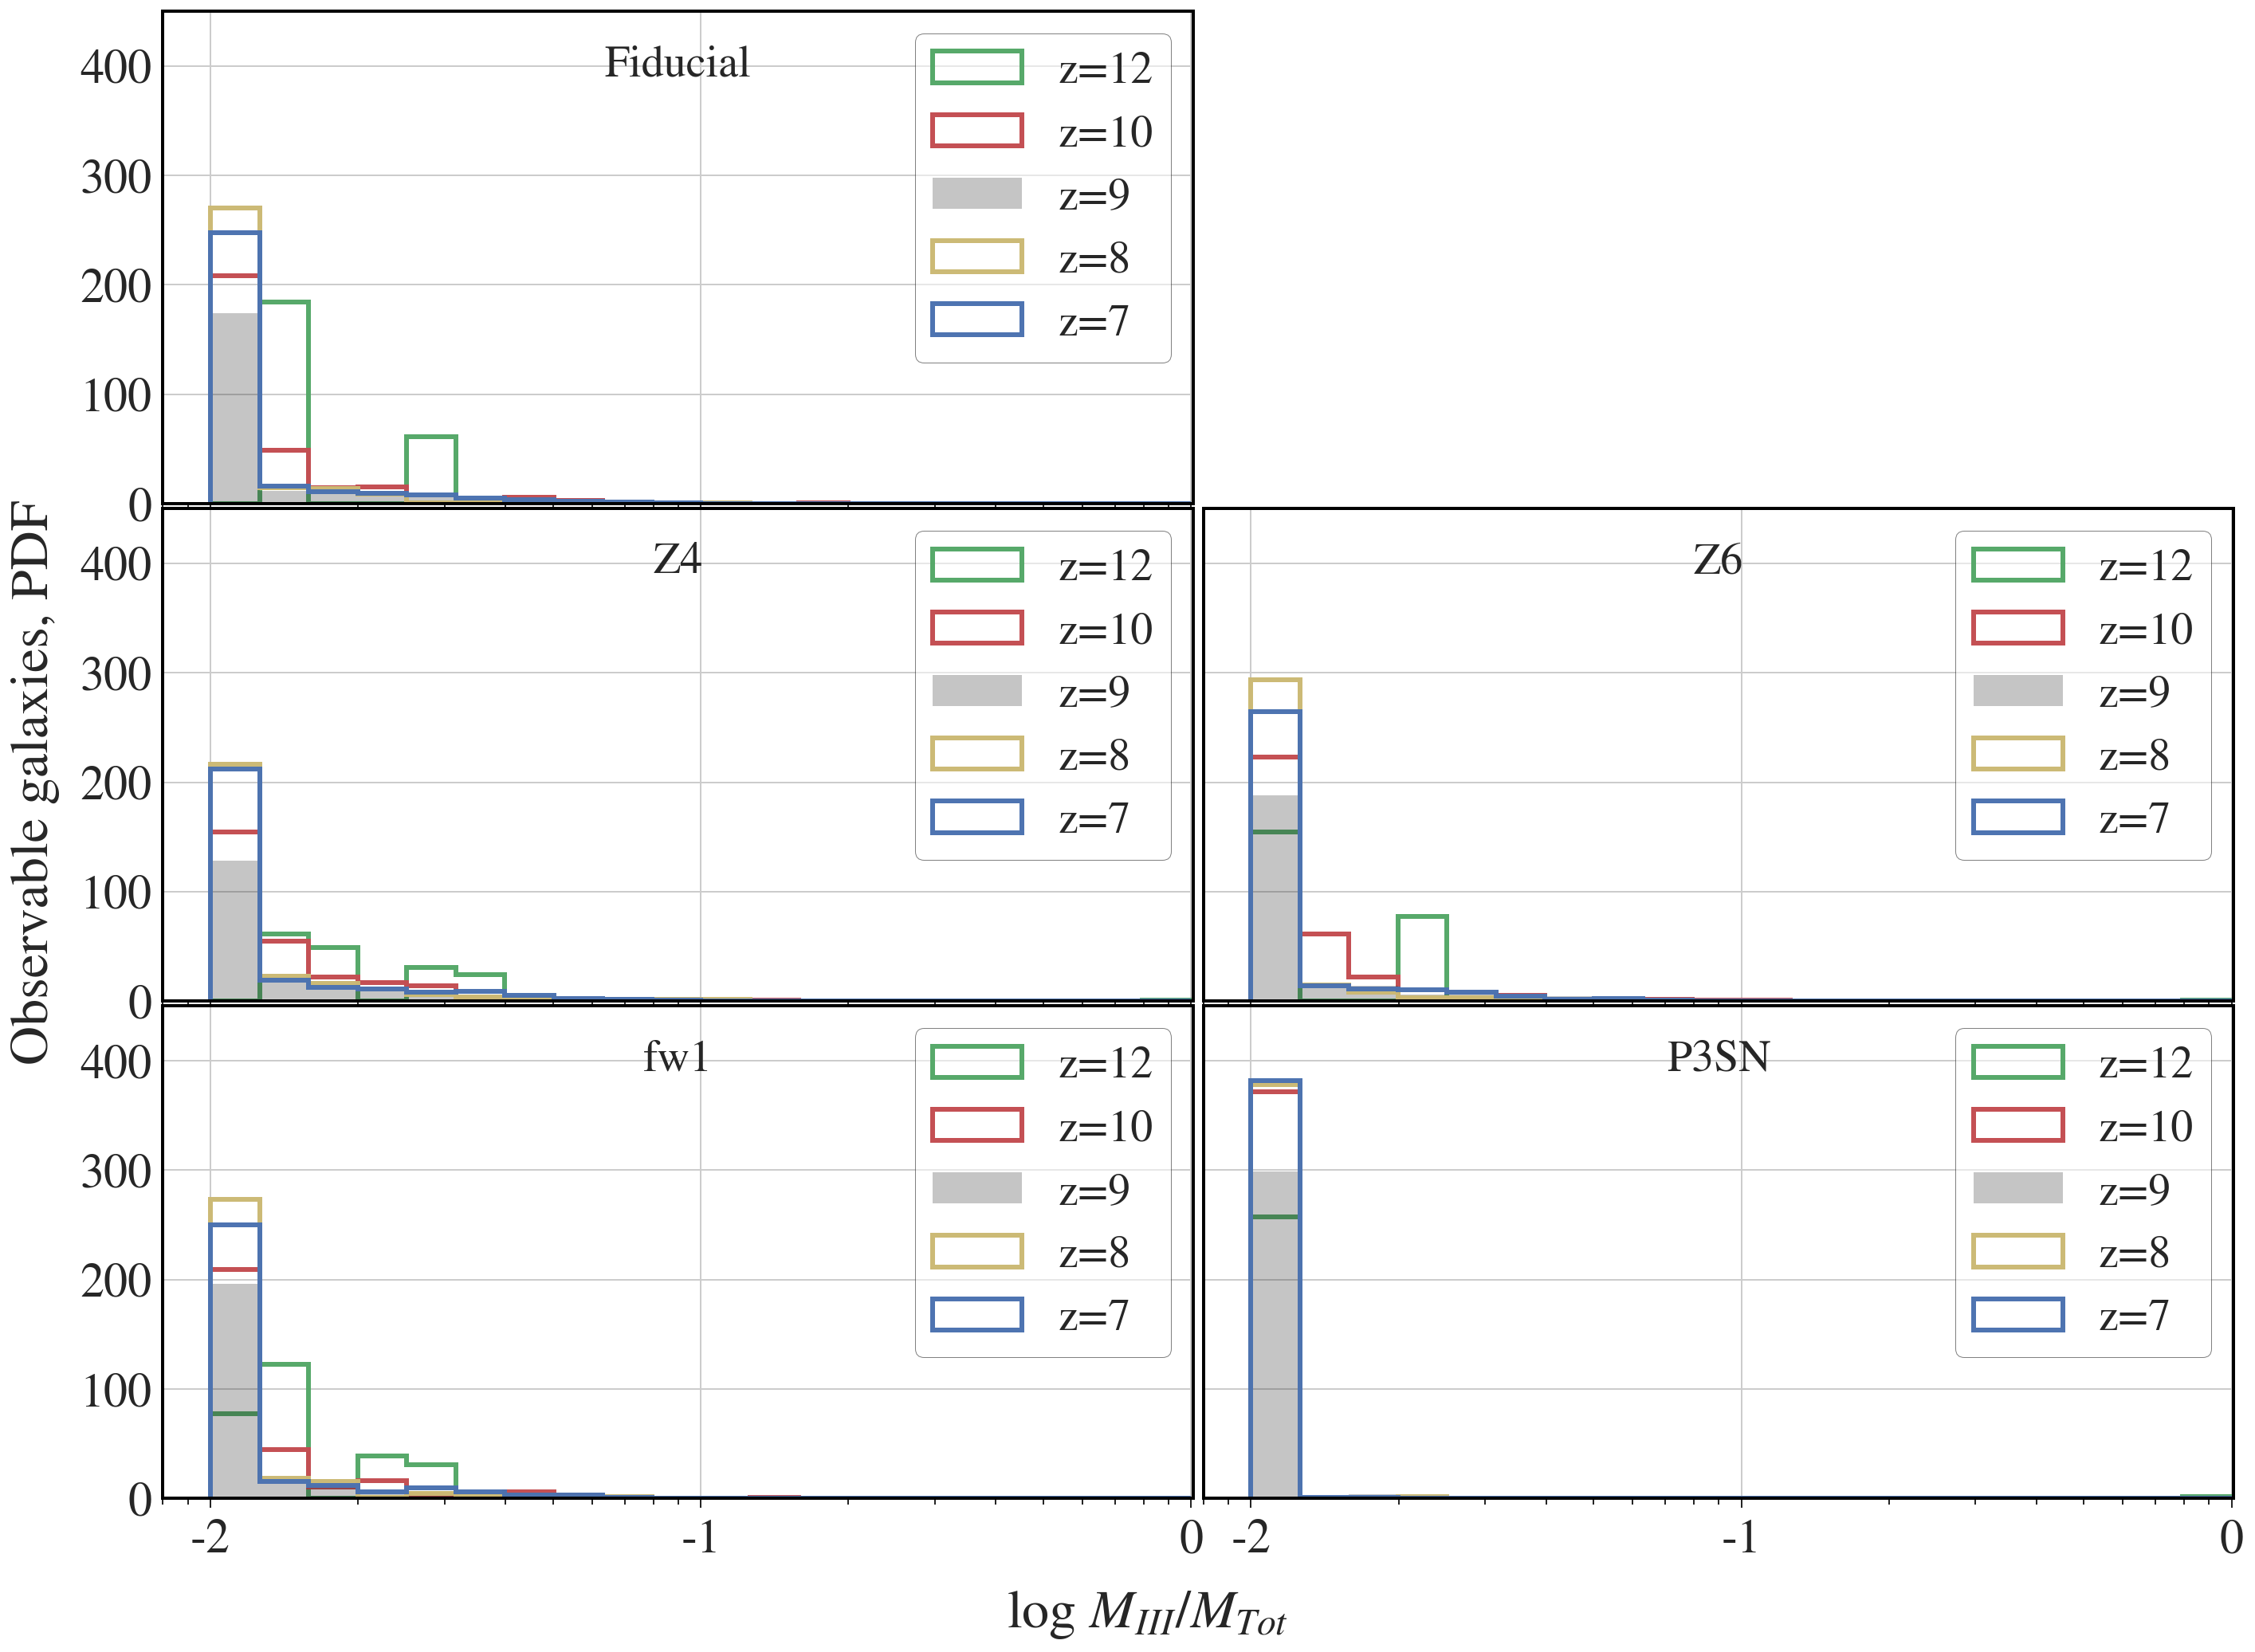

In [47]:
# Create histogram of masses of bright galaxes ...this is the way to do it... 
# Plot the fraction of Pop III mass, binned

tot = mpatches.Patch(color='C0', label=r'Total halo mass')
p3  = mpatches.Patch(color='C2', label=r'Pop III halo mass')

data_set_names = { 0:0,'fid':'fid', 'fid':'fid', 
                  'P3SN':'P3SN','p3SN':'P3SN', 'fid':'Fiducial'}
massBins = np.logspace(-2,0,21)
fig, axs = plt.subplots(nrows=3, ncols=2, sharex='col',sharey='row',squeeze=True, figsize=(22,16))
axs[0, 1].axis('off')
# axs[2, 1].axis('off')
for dir,ax in zip(['fid', 0, 'fid', 'fid', 'P3SN','p3SN'], axs.flat):
    print(dir)
    if dir == 0:
        continue
    for z,c in zip([12,10,9,8,7],['C1','C2','C3','C4','C6']):

        ax.set_xscale('log')
    
        obsGals_P3Mass = haloData[dir][z][cond(dir,p3ff,z,0.0,limMag,mags)]['M3StarMsun']
        obsGals_TotMass= haloData[dir][z][cond(dir,p3ff,z,0.0,limMag,mags)]['MstarMsun']
        
        obsGalsP3Tot_ratio = obsGals_P3Mass/obsGals_TotMass
        obsGalsP3Tot_ratio[obsGalsP3Tot_ratio < 0.01] = 0.01
        
        if z == 9:
            ax.hist(obsGalsP3Tot_ratio,
                bins=massBins, alpha=0.25, color='k', density=True, # histtype='step', lw=3, ls=ls1,
                label=r'z={}'.format(z))
            ax.annotate("{}".format(data_set_names[dir]), xy = (0.5, 0.5), xytext = (.5, .85), xycoords='axes fraction',
                            textcoords = 'axes fraction', ha = 'center', va = 'bottom',fontsize=28,rotation=0)
        else:
            ax.hist(obsGalsP3Tot_ratio,
                bins=massBins, alpha=0.99, color=c, density=True, histtype='step', lw=3, ls='-',
                label=r'z={}'.format(z))
        
        if dir == 'fid' or dir == 'fid':
            ax.tick_params(axis='x',which='both',bottom=False, top=False )
        else:
            ax.tick_params(axis='x',which='both',bottom=True, top=False )

        ax.set_xlim([8e-3,1.01])
        ax.set_ylim([0.0,450])
        ax.xaxis.set_major_formatter(logfmt)
        ax.xaxis.set_tick_params(which='major',width=1,length=6)
        ax.xaxis.set_tick_params(which='minor',width=1,length=4)
        ax.get_yaxis().set_tick_params(which='both', direction='in',labelsize=22)
    #     ax.set_xticks(np.arange(7,15))
#         ax.set_yticks([1,2,5,10,20,30,50,80,100])
    #     ax.set_yticklabels(['.01','.05','.1','.2','.3','.5','.8'])
        ax.tick_params(axis='both',labelsize=30)

        lk = ax.legend(loc=1, fontsize=28, framealpha=0.55, fancybox=True, edgecolor='k' )
        lk.get_frame().set_linewidth(0.5)
        lk.set_frame_on(True)
        if dir == 'fid':
            for tk in ax.get_yticklabels():
                tk.set_visible(True)

    

plt.subplots_adjust(left=0.06, bottom=0.11, right=.88, top=0.92, wspace=.01, hspace=.01)

# fig.text(0.5, 0.977,'Top middle', ha='center',size=28 )
fig.text(0.45, 0.04, 'log $M_{III}/M_{Tot}$', ha='center',size=34 )
fig.text(0.00, 0.5, 'Observable galaxies, PDF',size=34,va='center', rotation='vertical')
    
fig.savefig("PopIII-brightAll-mf-89.pdf",dpi=fig.dpi,bbox_inches='tight')

In [181]:
haloData['fid'][9]

array([(0.0, 5.92, 0.0001125, 0.0001125, 50740.0, 7757.0, 8.206, 4.849e-34, 6.088e-37, 4.845e-34, 8.149e-40, 4.338e-15, 5.446e-18),
       (1.0, 5.92, 0.0, 0.0, 68800.0, 68800.0, 68800.0, 4.421e-33, 4.421e-33, 4.421e-33, 4.421e-33, 3.955e-14, 3.955e-14),
       (2.0, 5.92, 0.005591, 0.0005699, 2038000.0, 52120.0, 2.077, 3.11e-33, 2.018e-37, 3.119e-33, 4.385e-39, 2.782e-14, 1.805e-18), ...,
       (2108.0, 2.92, 3.436e-05, 0.0, 43000.0, 17.23, 11.42, 5.157e-34, 9.718e-37, 5.149e-34, 0.0, 4.613e-15, 8.694e-18),
       (2109.0, 2.92, 0.0001268, 0.0001268, 42140.0, 7745.0, 4.015, 4.749e-34, 2.241e-37, 4.748e-34, 5.592e-40, 4.248e-15, 2.005e-18),
       (2110.0, 2.92, 0.0003094, 0.0, 380100.0, 0.0, 0.0, 3.585e-33, 0.0, 3.585e-33, 0.0, 3.207e-14, 0.0)], 
      dtype=[('halo', '<f8'), ('r_v', '<f8'), ('ZZsun', '<f8'), ('ZPZsun', '<f8'), ('MstarMsun', '<f8'), ('M3StarMsun', '<f8'), ('M3YngMsun', '<f8'), ('1500A', '<f8'), ('1500A_P3', '<f8'), ('1500A_NM', '<f8'), ('1500A_P3NM', '<f8'), ('1500A_

In [188]:
pop3Fraction.size,obsGalsP3Tot_ratio.size

(8260, 517)

Working on z=7
Largest bin value: 0.000, smallest -2.9633155113861114


/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:67: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:68: RuntimeWarning: divide by zero encountered in log10


Working on z=8
Largest bin value: 0.000, smallest -2.81424759573192
Working on z=9
Largest bin value: -0.006, smallest -2.792391689498254
Working on z=10
Largest bin value: 0.000, smallest -2.2833012287035497
Working on z=12
Largest bin value: 0.000, smallest -2.0969100130080562
Working on z=15
Largest bin value: 0.000, smallest -1.7242758696007892
Working on z=7
Largest bin value: 0.000, smallest -3.1577588860468637
Working on z=8
Largest bin value: 0.000, smallest -2.75815462196739
Working on z=9
Largest bin value: -0.007, smallest -2.7151673578484576
Working on z=10
Largest bin value: 0.000, smallest -2.2174839442139063
Working on z=12
Largest bin value: 0.000, smallest -2.037426497940624
Working on z=15
Largest bin value: 0.000, smallest -1.6020599913279623
Working on z=7
Largest bin value: 0.000, smallest -3.1000257301078626
Working on z=8
Largest bin value: 0.000, smallest -2.9489017609702137
Working on z=9
Largest bin value: -0.007, smallest -2.7466341989375787
Working on z=10
L

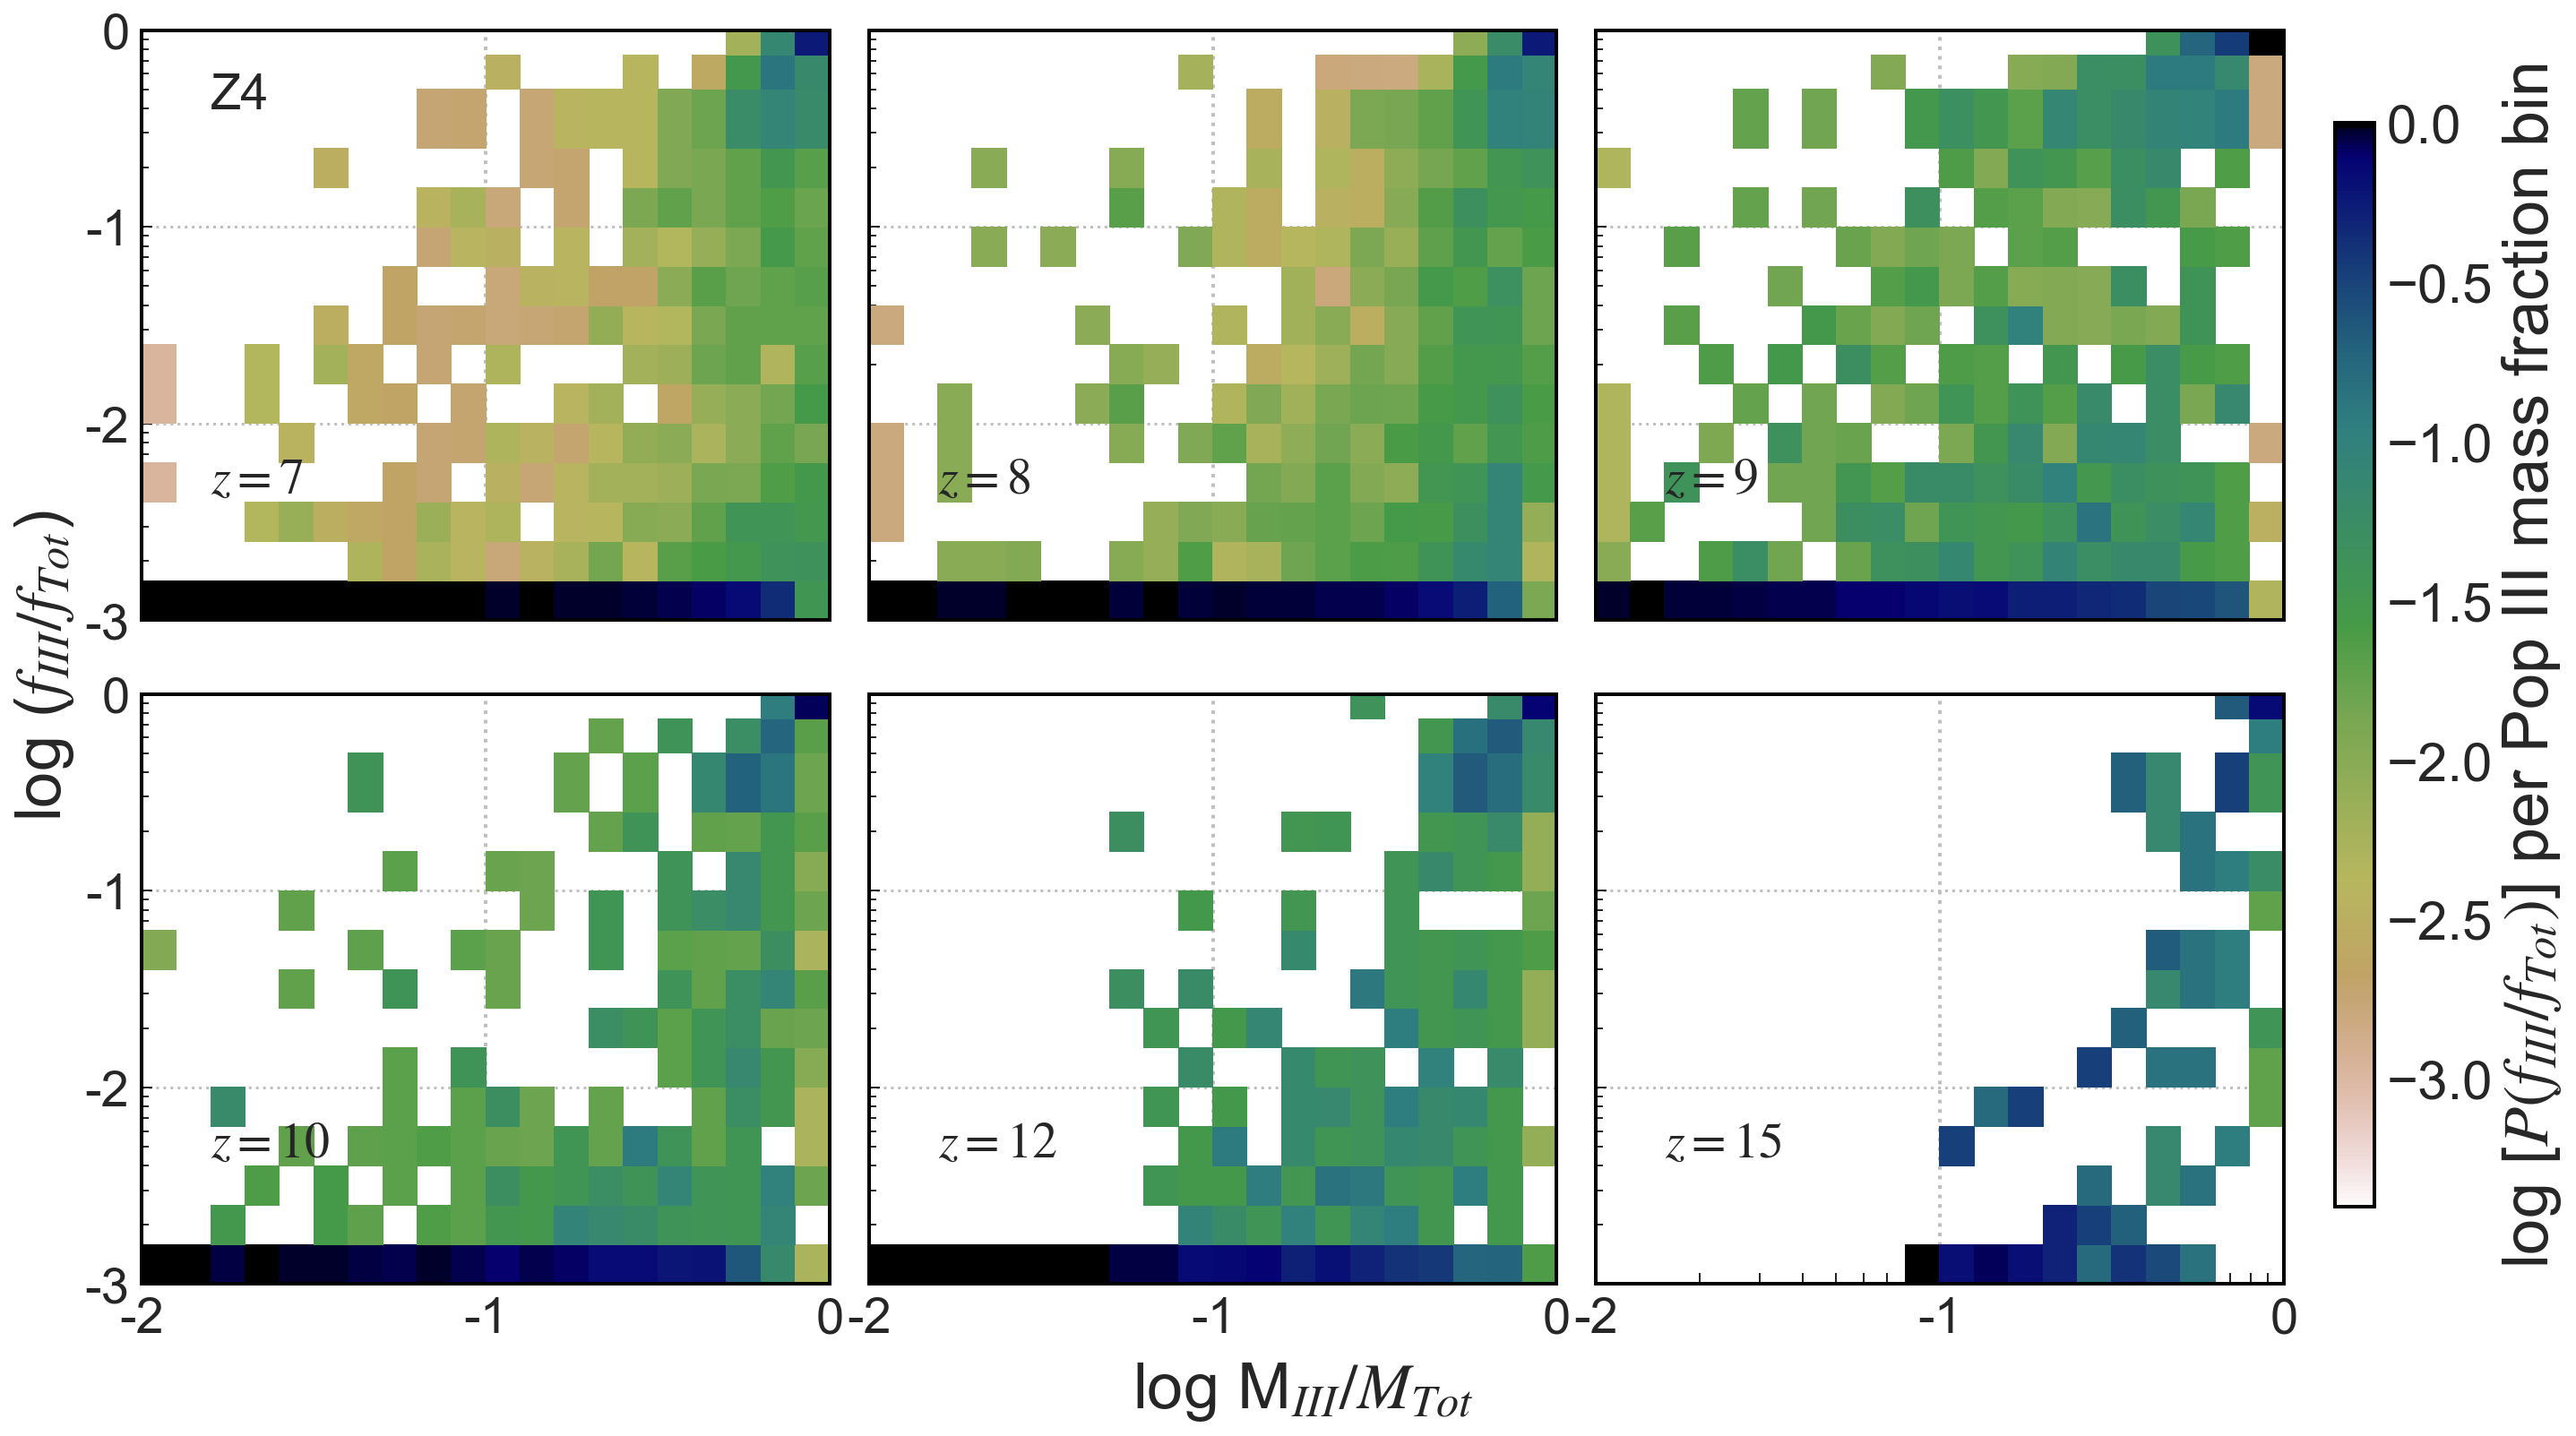

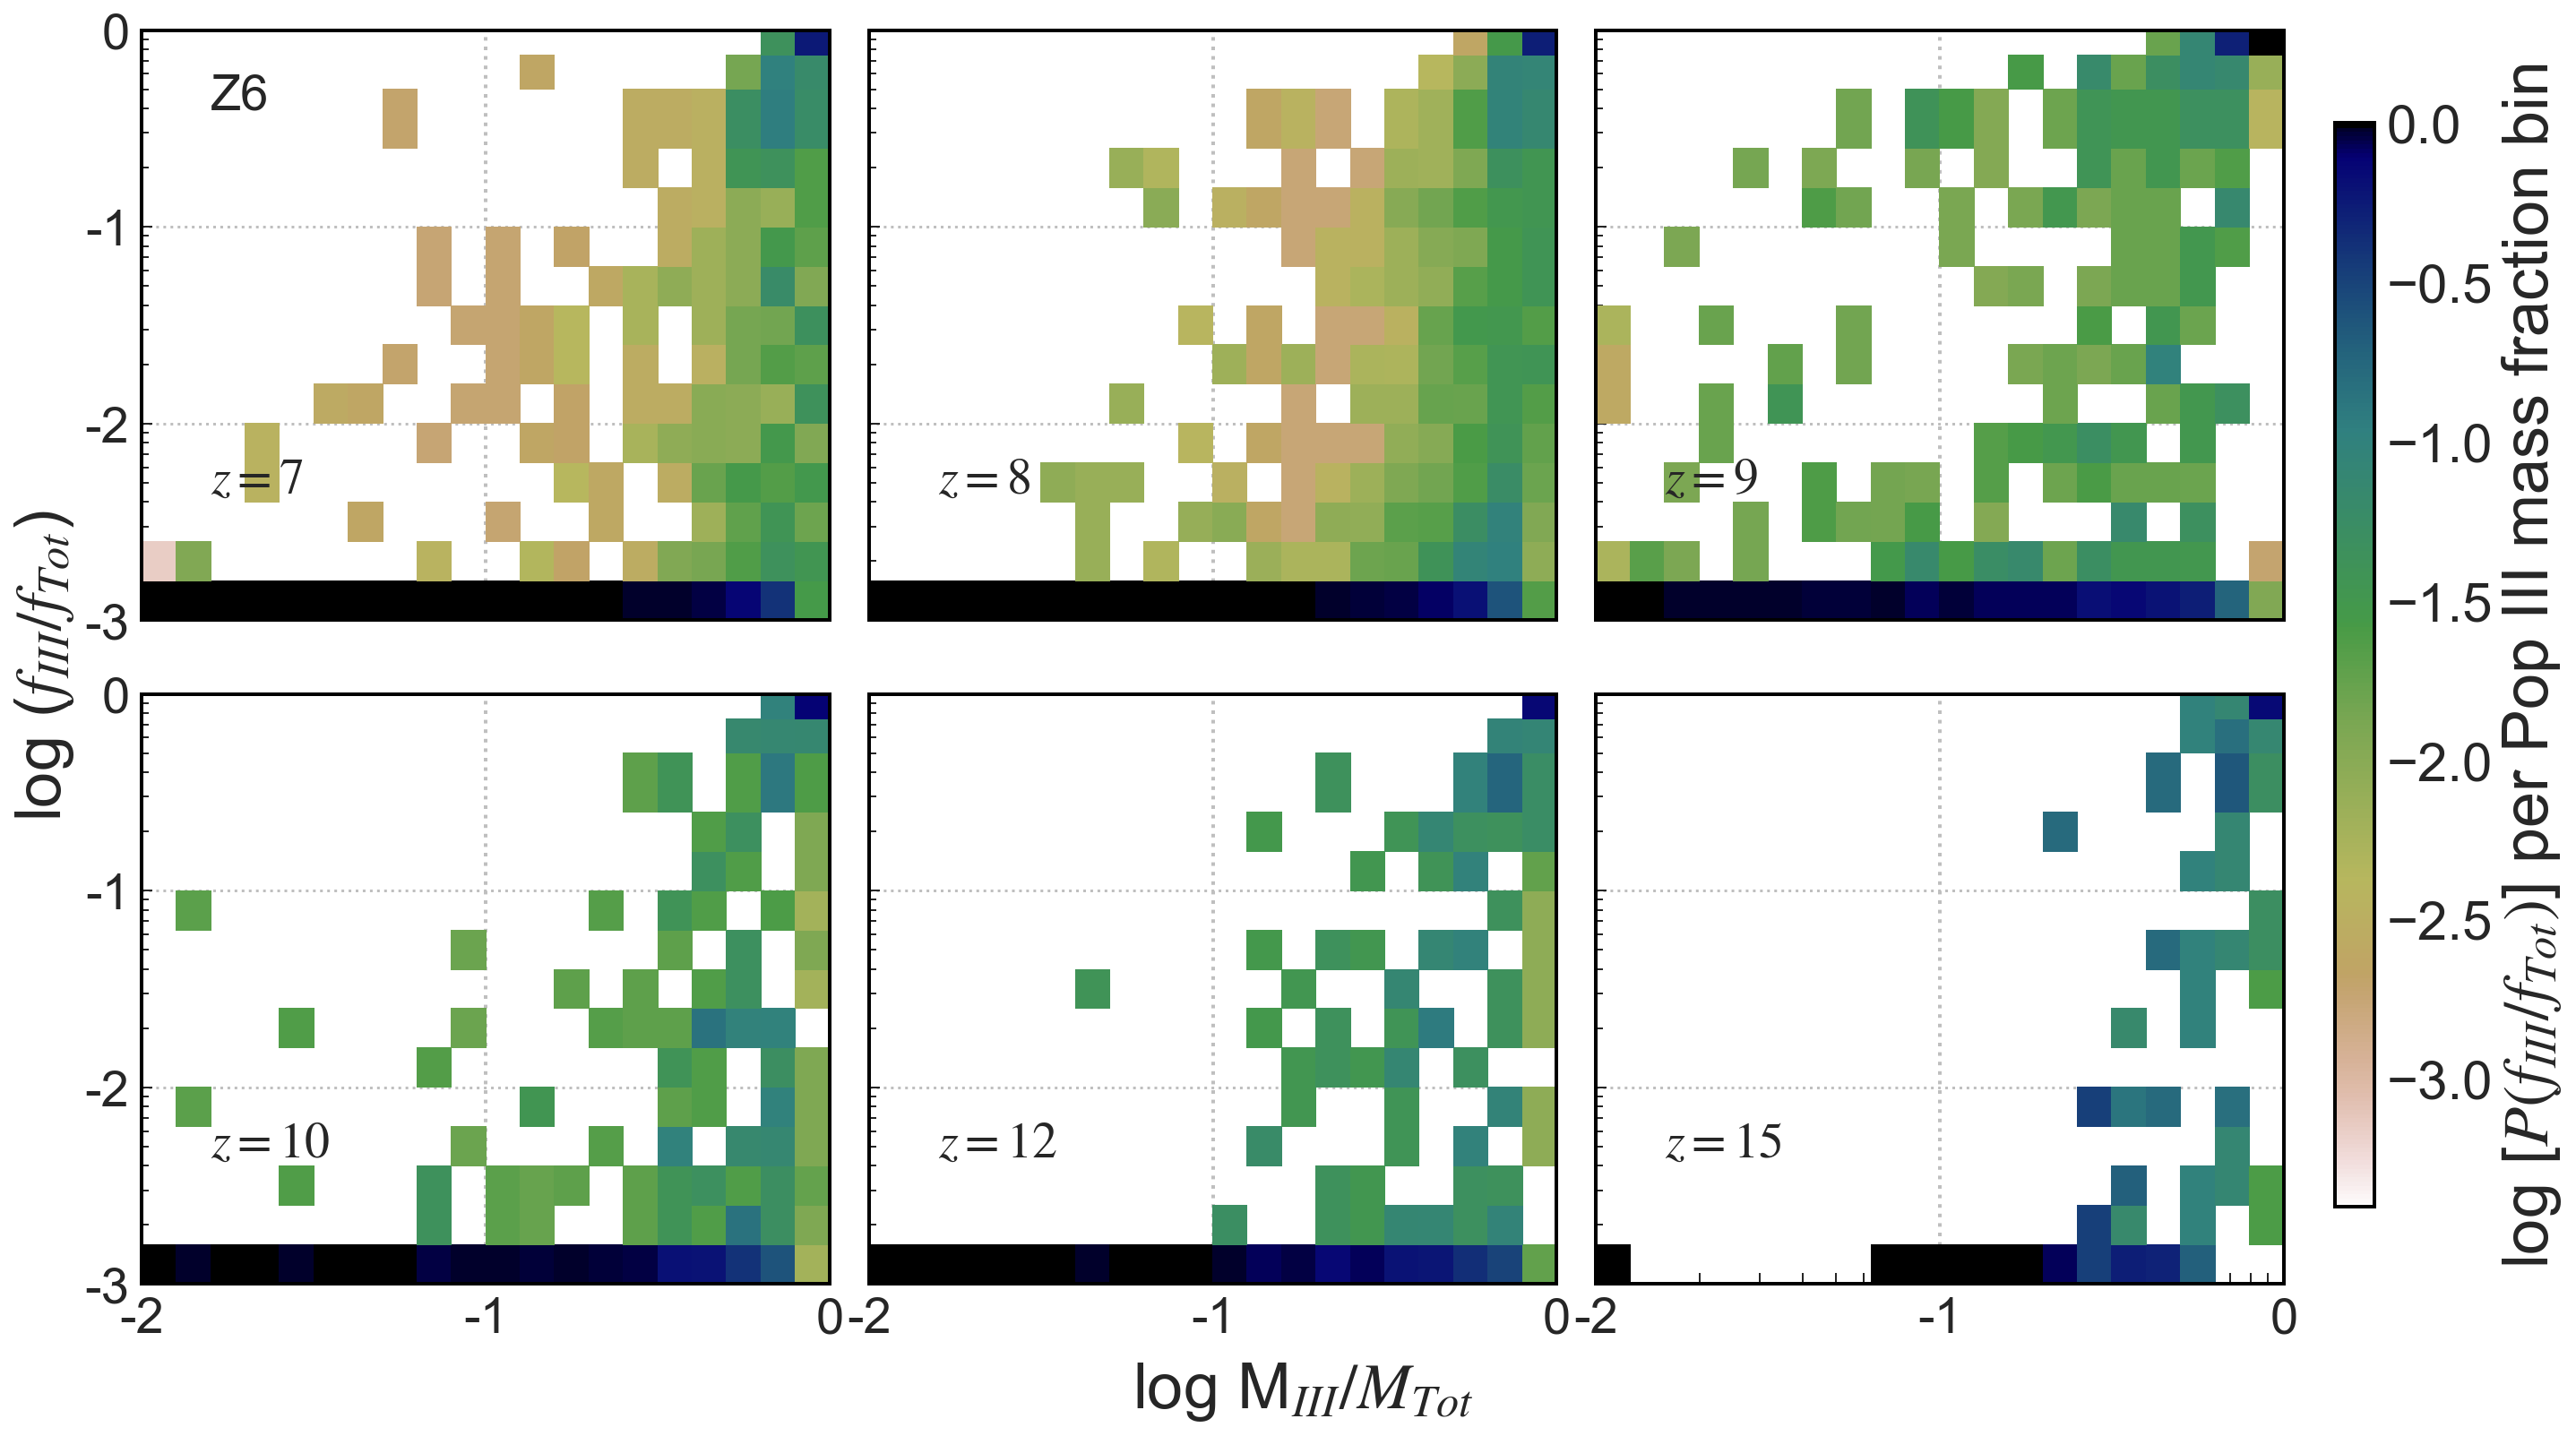

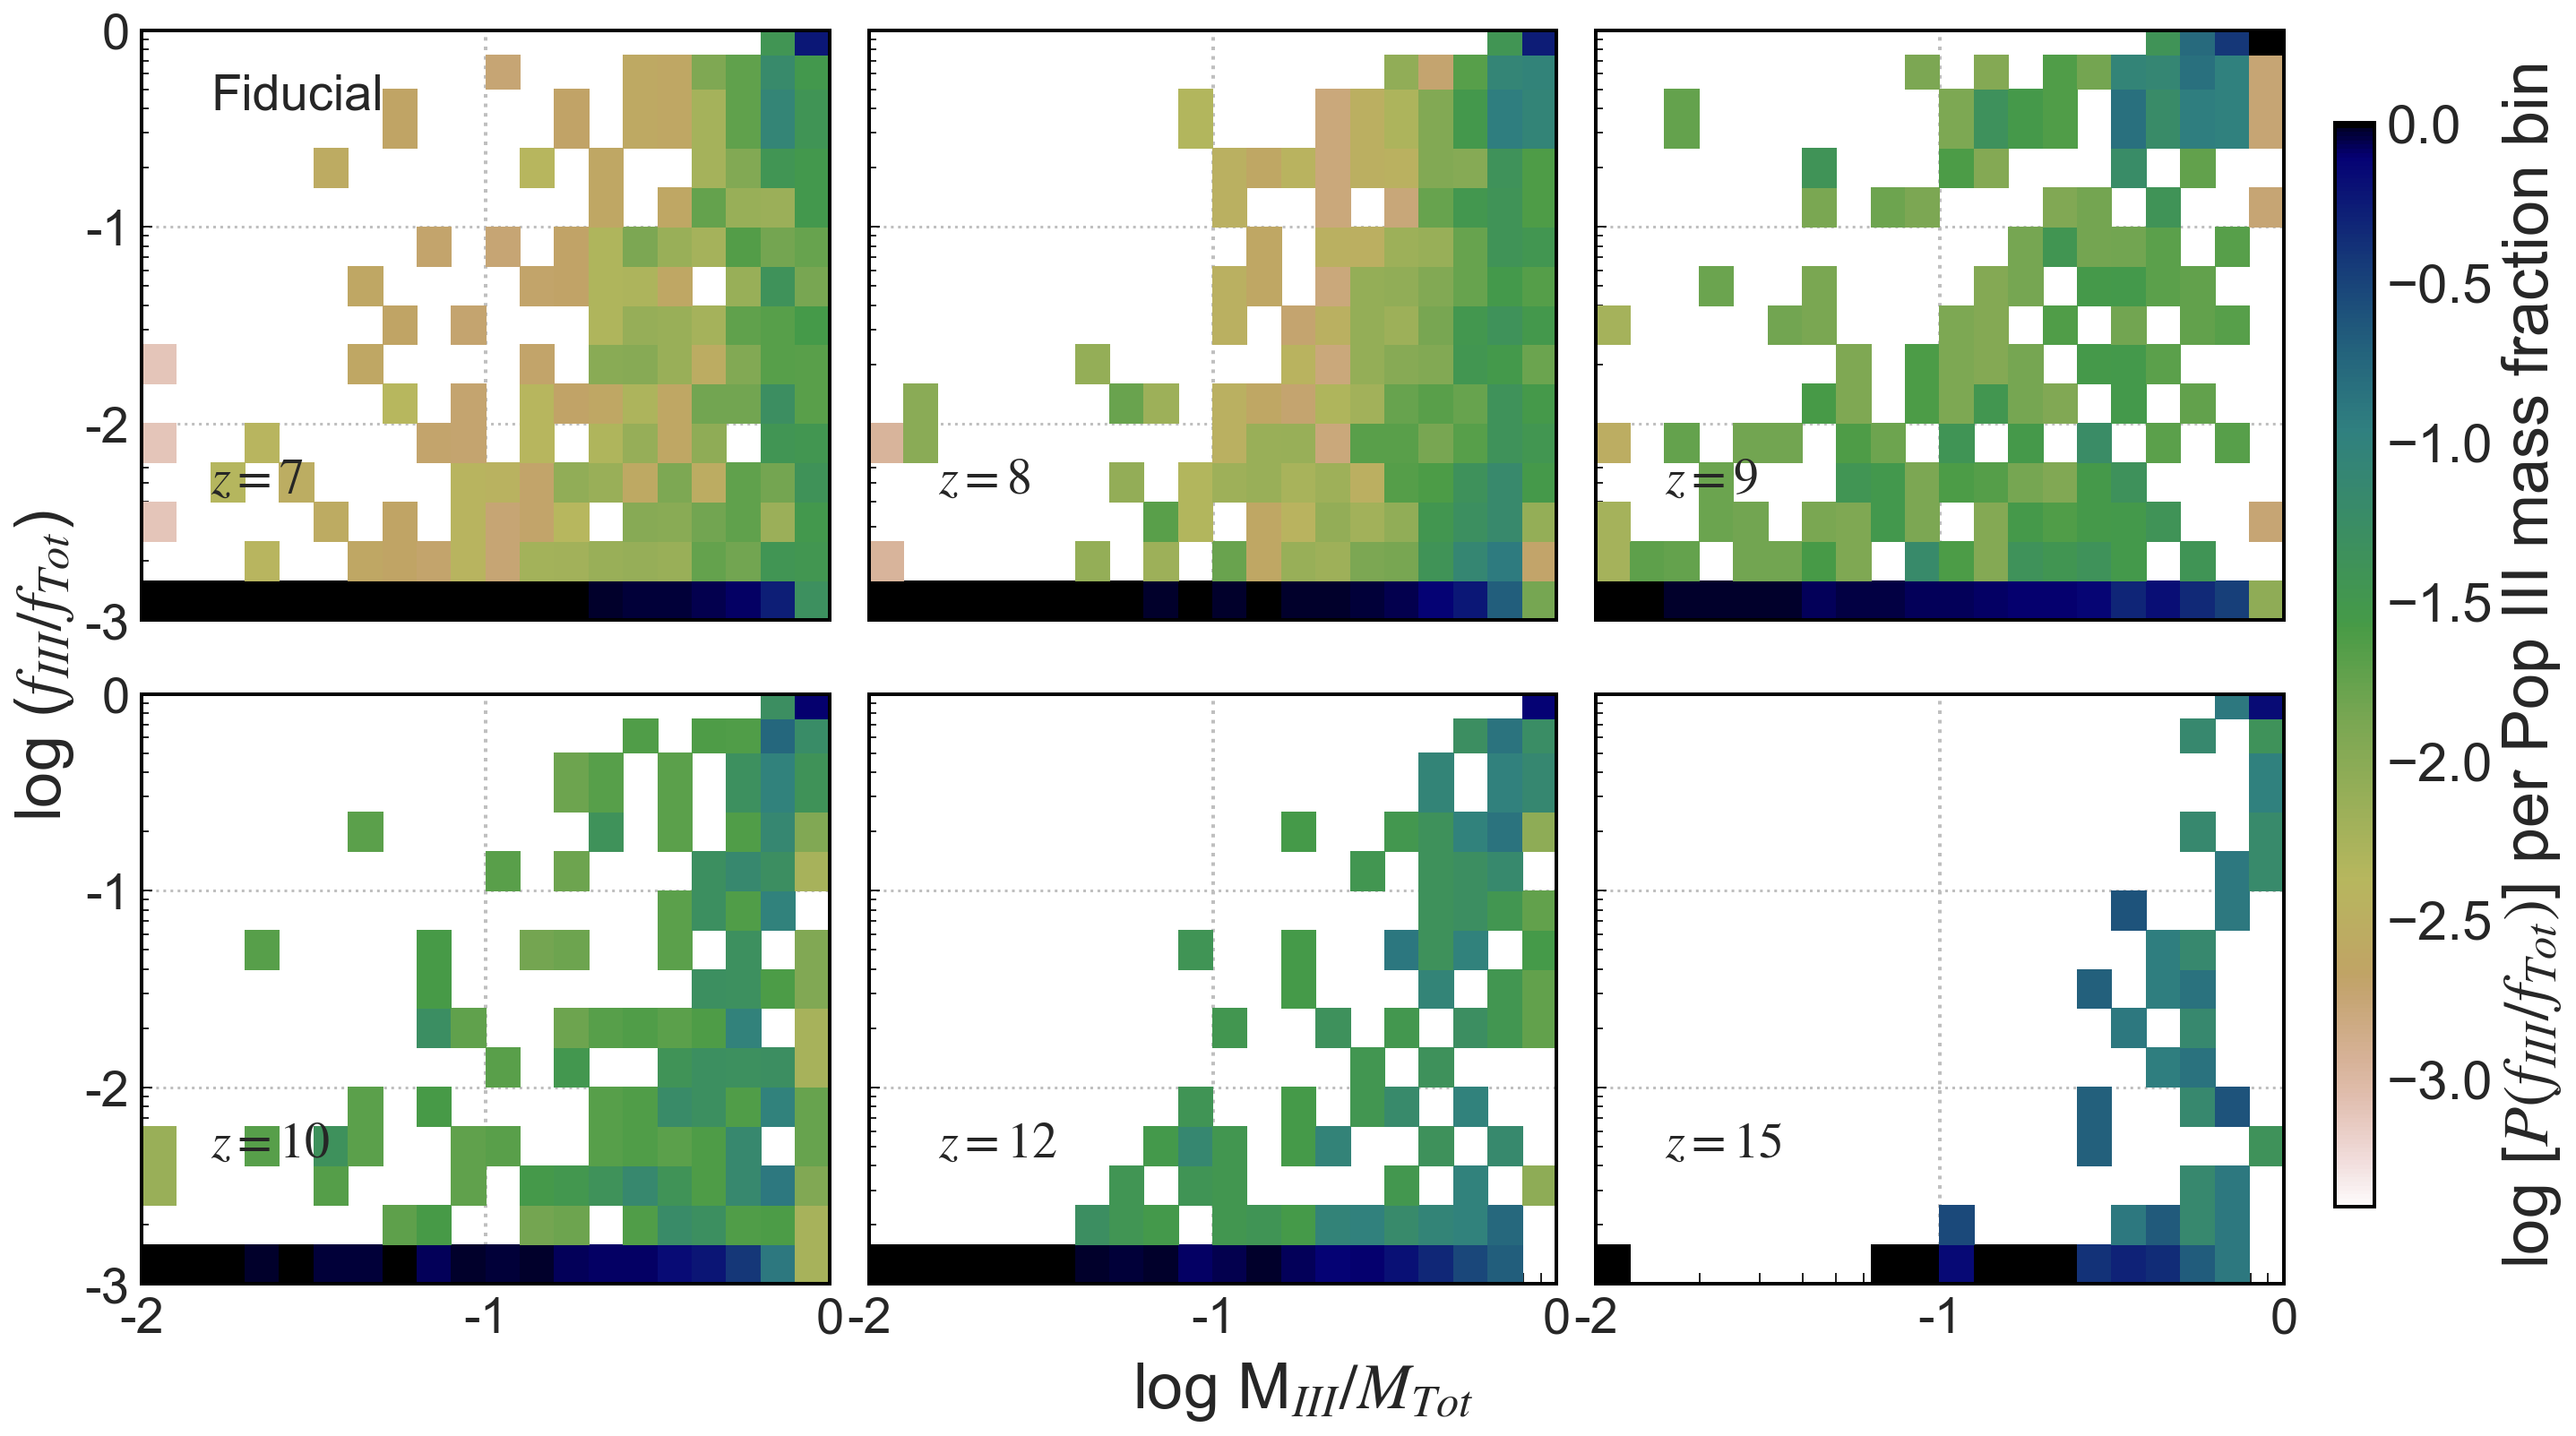

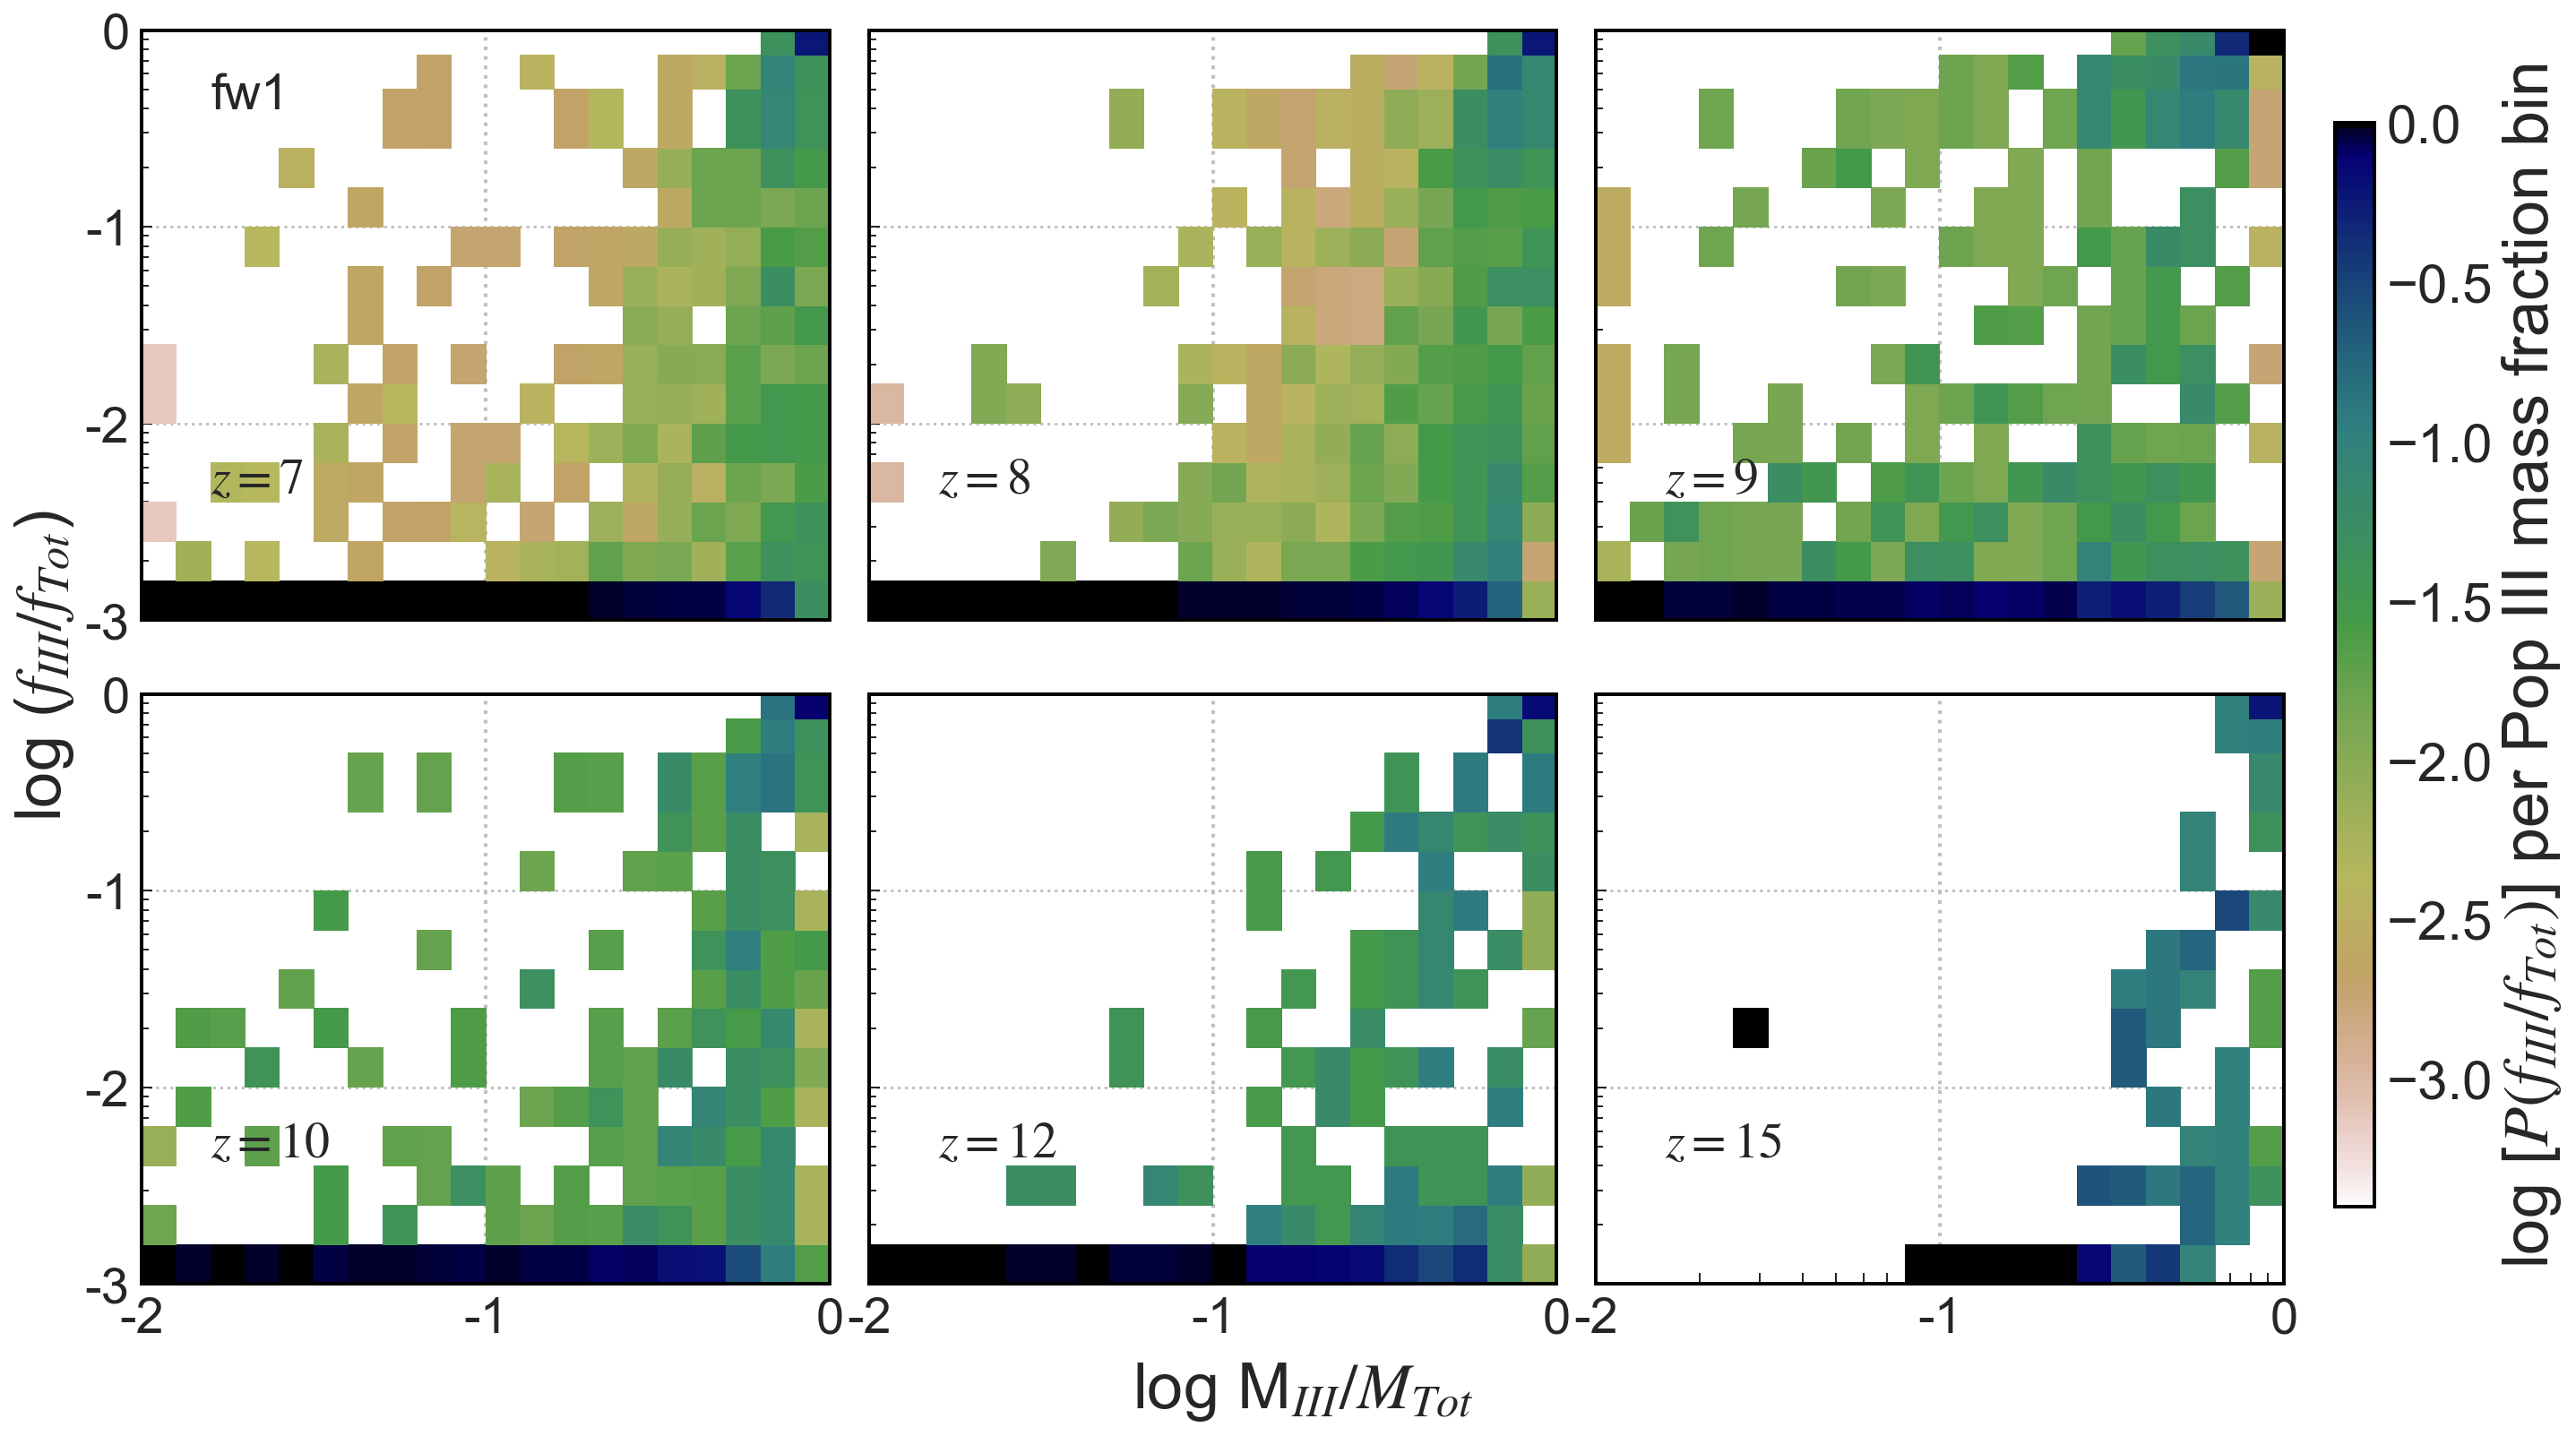

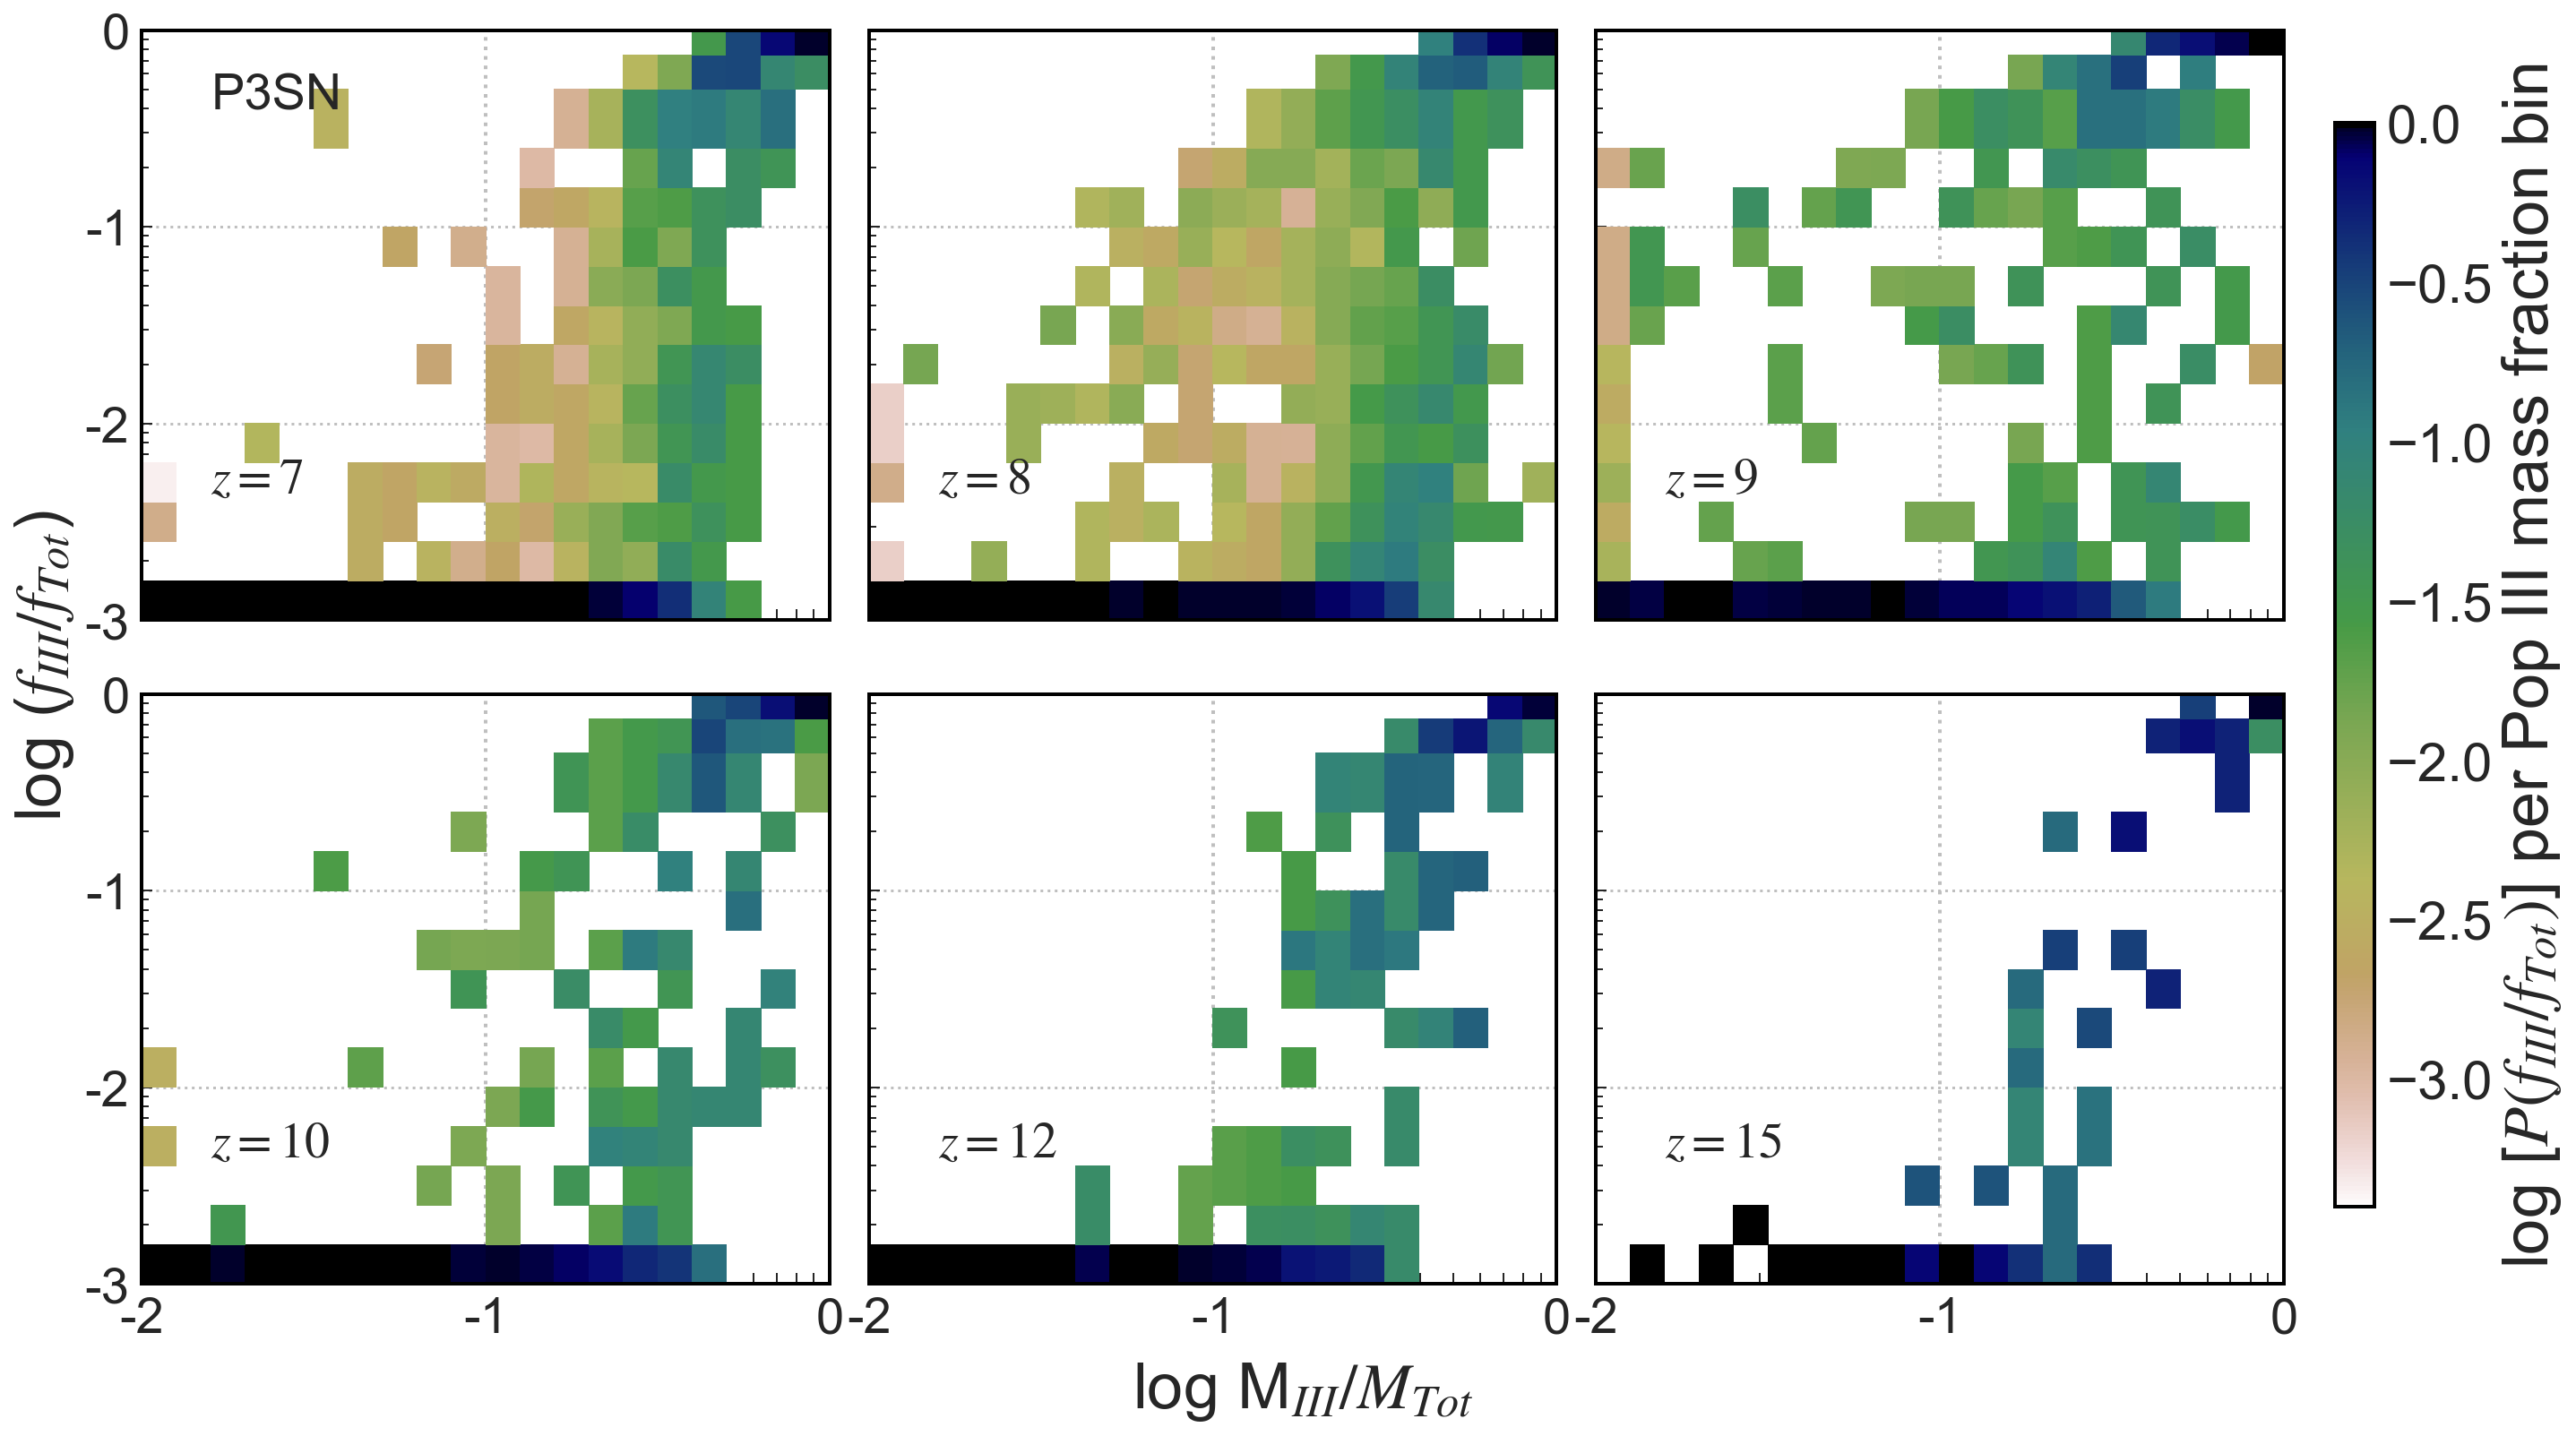

In [197]:
# Normalize the probability in each row such that it totals to 1.0


#
# No classical Pop III
# Pop III flux frac probabliity as a function of Pop III mass fraction... 
#

sns.set(style="whitegrid", font_scale=2, color_codes=True)
sns.set_style({'axes.edgecolor': '0.0','axes.linewidth': 2.0})

# Plot the fraction of Pop III magnitude vs M_AB NORMALIZED...

brightM = -22
limitM  = brightM+9
rgForSFunc = np.arange(brightM,limitM, 0.1)

massBins = np.logspace(-2,0,21) 
# fracBins = np.logspace(-3,0,23)
# Contrived bin spacing such that the top bin represents .75-1.0 Pop III fraction
# and the next bin down represents .5-0.75 ...
fracBins = [0.001,  0.00158489,  0.00251189,  0.00398107,  0.00630957,
             0.01,  0.01584893,  0.02511886,  0.03981072,  0.06309573,
             0.1,  0.15848932,  0.25118864,
             0.5,   0.75,   1.0]

baseline = 'Fiducial'

data_set_names = {'fid':'fid', 'fid':'fid', 
                  'P3SN':'P3SN','p3SN':'P3SN', 'fid':'Fiducial'}

doNMnow = False
for dir in sorted(data_set_names.keys()):
    fig, axs = plt.subplots(nrows=2, ncols=3, sharex='col',sharey='row',squeeze=True, figsize=(20,12))
    for z,ax in zip([7,8,9,10,12,15], axs.flat):

#         if z not in thezs:
#             continue

        pop3Fraction = haloData[dir][z]['1500A_P3']/haloData[dir][z]['1500A']
#         print("Pop III flux fraction is {:.5f} at z={}".format(p3ff[z],z))
        pop3Fraction[pop3Fraction < 1e-3] = 1e-3  # Map Pop 3 flux < 1e-3 to 1e-3

        obsGals_P3Mass = haloData[dir][z]['M3StarMsun']
        obsGals_TotMass= haloData[dir][z]['MstarMsun']
        obsGalsP3Tot_ratio = obsGals_P3Mass/obsGals_TotMass
        obsGalsP3Tot_ratio[obsGalsP3Tot_ratio < 0.01] = 0.01
        
        
        print("Working on z={}".format(z))
        # If we are back to z = 8,9,10 then generate plots for NO Mixing


        # Note that we are reversing x,y here since pcolormesh interprets them backwards!
        nTempA, binsx, binsy = np.histogram2d(pop3Fraction,obsGalsP3Tot_ratio,bins=[fracBins,massBins],normed=False)
        # could use weights=[1/simVol for i in absMag] to normalize by vol here... 
        # normed : bool, optional
        #        If False, returns the number of samples in each bin. If True, returns the bin density 
        #        bin_count / sample_count / bin_area.

        X, Y = np.meshgrid(massBins, fracBins)  # Create a grid over the range of bins for the plot

        # Mask out 0 values before taking log10... 
        H = np.ma.masked_where(nTempA==0.0, nTempA)
        for i in range(len(H[0,:])):     # Column index i, over len of row 0
            colTot = np.sum(H[:,i])
            for j in range(len(H[:,0])): # Row index j, over len of column 0
                H[:,i][j] = H[:,i][j]/colTot
        H = np.log10(H)        # Take log of counts, we've already normalized by volume and area
        print("Largest bin value: {:.3f}, smallest {}".format(H.max(),H.min()))
        # Create the plot
        im = (ax.pcolormesh(X, Y, H, cmap=mpl.cm.gist_earth_r , vmin=-3.4, vmax=0) )
        if z == 7:
            ax.annotate("{}".format(data_set_names[dir]), xy = (0.5, 0.5), xytext = (.1, .85), xycoords='axes fraction',
                            textcoords = 'axes fraction', ha = 'left', va = 'bottom',fontsize=28,rotation=0)
        ax.annotate("$z={}$".format(z), xy = (0.5, 0.5), xytext = (.1, .2), xycoords='axes fraction',
                            textcoords = 'axes fraction', ha = 'left', va = 'bottom',fontsize=28,rotation=0)

        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.yaxis.set_tick_params(which='major',width=1,length=6)
        ax.yaxis.set_tick_params(which='minor',width=1,length=4)
        ax.xaxis.set_tick_params(which='both',width=1,length=6)
#         ax.xaxis.set_ticks(np.arange(brightM,limitM+1, 2))
#         minorLocator = ticker.MultipleLocator(1)
#         ax.xaxis.set_minor_locator(minorLocator)
        ax.get_yaxis().set_tick_params(which='both', direction='in',labelsize=28)
        ax.get_xaxis().set_tick_params(which='both', direction='in',labelsize=28)
        ax.xaxis.set_major_formatter(logfmt)
        ax.yaxis.set_major_formatter(logfmt)
        ax.set_xlim([1e-2,1.0])
        ax.set_ylim([1e-3,1.0])
        ax.grid(which='major', axis='y', color='0.75', linestyle=':', linewidth=1.5)
        ax.grid(which='major', axis='x', color='0.75', linestyle=':', linewidth=2.0)

        gc.collect()

    plt.subplots_adjust(left=0.05, bottom=0.1, right=.88, top=0.91, wspace=.057, hspace=.125)

    fig.text(0.5, 0.02, r'log M$_{III}/M_{Tot}$', ha='center',size=36 )
    fig.text(0.00, 0.5, r'log ($f_{III}/f_{Tot}$)',size=36,va='center', rotation='vertical')

    # Create the colorbar
    cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax)

    cbar.ax.tick_params(labelsize=30) 
    #cbar.ax.set_yticklabels(['1', '2', '4', '6', '10', maxCV], size=24)
    cbar.set_label("log [$P(f_{III}/f_{Tot})$] per Pop III mass fraction bin",fontsize=36)
    plt.savefig("PopIII_ffmf-Hist{}.pdf".format(dir),dpi=fig.dpi,bbox_inches='tight')
    gc.collect()